# Lets create a Recommendation system for the Henry coefficients of porous materials

In [1]:
import json
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import pprint
import os
import scipy
import matplotlib
import umap
from matplotlib.patches import Circle
from adjustText import adjust_text

In [2]:
MIN_UNIQUE_ISOTHERMS = 4

## We will use the Henry Coefficient matrix, created in `HenryMatrix.ipynb`

In [3]:
_henry_df = pd.read_csv('data/henry_matrix_df_l_' + str(MIN_UNIQUE_ISOTHERMS) + '.csv')
_henry_df.set_index(list(_henry_df)[0], inplace=True)
_henry_df.head(10)

,CURLTUGMZLYLDI-UHFFFAOYSA-N_298K,IJGRMHOSHXDMSA-UHFFFAOYSA-N_298K,VNWKTOKETHGBQD-UHFFFAOYSA-N_298K,MYMOFIZGZYHOMD-UHFFFAOYSA-N_298K,QQONPFPTGQHPMA-UHFFFAOYSA-N_298K,ATUOYWHBWRKTHZ-UHFFFAOYSA-N_298K,HSFWRNGVRCDJHI-UHFFFAOYSA-N_298K,UFHFLCQGNIYNRP-UHFFFAOYSA-N_298K,OTMSDBZUPAUEDD-UHFFFAOYSA-N_298K,VGGSQFUCUMXWEO-UHFFFAOYSA-N_298K,...,RWSOTUBLDIXVET-UHFFFAOYSA-N_298K,OFBQJSOFQDEBGM-UHFFFAOYSA-N_298K,LRHPLDYGYMQRHN-UHFFFAOYSA-N_298K,URLKBWYHVLBVBO-UHFFFAOYSA-N_298K,RAHZWNYVWXNFOC-UHFFFAOYSA-N_298K,SWQJXJOGLNCZEY-UHFFFAOYSA-N_298K,GQPLMRYTRLFLPF-UHFFFAOYSA-N_298K,VXNZUUAINFGPBY-UHFFFAOYSA-N_298K,WSFSSNUMVMOOMR-UHFFFAOYSA-N_298K,QWTDNUCVQCZILF-UHFFFAOYSA-N_298K
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
NIST-MATDB-b2dc02871a66ac38e4b195796cf3e00b,0.763795,0.144904,0.319406,NaN,24.205553,39.949433,0.001506,0.036228,2.355812,1.524489,...,NaN,NaN,NaN,200.460069,22.948550,NaN,NaN,NaN,NaN,NaN
NIST-MATDB-035dc75dddd00241bd76627f78cbef2d,89.667314,0.539600,0.893499,0.118636,245.560096,229.943181,NaN,NaN,8.079139,5.128141,...,NaN,NaN,NaN,NaN,NaN,0.000592,107.207836,177.526659,NaN,NaN
NIST-MATDB-453276ee992ed07dc207ed08b2b221ce,2.307321,0.327606,0.506279,0.206581,NaN,NaN,NaN,0.057261,4.063816,25.545440,...,10.015668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NIST-MATDB-1b85b1862d4e9cc2e0f46d0e2698ab79,1.499942,0.225363,0.760417,0.182960,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5929.947398,NaN,NaN,NaN,NaN,NaN,NaN
NIST-MATDB-991daf7313251e7e607e2bab2da57e33,5.173708,0.319807,0.890510,0.330443,672.745339,152.877325,53.408752,0.050019,0.838236,53.218759,...,NaN,20578.76316,NaN,NaN,50.780972,NaN,NaN,NaN,NaN,NaN
NIST-MATDB-9f02824618e94d86caedc9fb497366ba,0.207830,NaN,NaN,NaN,NaN,NaN,7.254404,0.027959,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NIST-MATDB-acbbe796d49416e999dc819f2ae65fe9,5.390284,NaN,1.531124,NaN,NaN,NaN,30.243870,0.080570,NaN,NaN,...,NaN,NaN,NaN,NaN,258.625128,NaN,NaN,NaN,NaN,NaN
NIST-MATDB-2c9380bddc59f547484ff729eab7d7cb,1.659815,0.217429,0.434413,NaN,NaN,NaN,1.286564,0.039007,6.555845,NaN,...,NaN,NaN,NaN,NaN,0.735938,NaN,2.053200,NaN,NaN,NaN
NIST-MATDB-ae6259bb1e493730cebe104ab746bb64,NaN,NaN,130.982658,NaN,NaN,NaN,NaN,NaN,2620.685397,5488.826719,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
idx = np.where(_henry_df.values == 0)
idx

(array([], dtype=int64), array([], dtype=int64))

In [5]:
log_henry_df = _henry_df.copy()
#log_henry_df.iat[idx[0][0], idx[1][0]] = np.nan
log_henry_df = np.log(log_henry_df)
log_henry_df.head(10)

,CURLTUGMZLYLDI-UHFFFAOYSA-N_298K,IJGRMHOSHXDMSA-UHFFFAOYSA-N_298K,VNWKTOKETHGBQD-UHFFFAOYSA-N_298K,MYMOFIZGZYHOMD-UHFFFAOYSA-N_298K,QQONPFPTGQHPMA-UHFFFAOYSA-N_298K,ATUOYWHBWRKTHZ-UHFFFAOYSA-N_298K,HSFWRNGVRCDJHI-UHFFFAOYSA-N_298K,UFHFLCQGNIYNRP-UHFFFAOYSA-N_298K,OTMSDBZUPAUEDD-UHFFFAOYSA-N_298K,VGGSQFUCUMXWEO-UHFFFAOYSA-N_298K,...,RWSOTUBLDIXVET-UHFFFAOYSA-N_298K,OFBQJSOFQDEBGM-UHFFFAOYSA-N_298K,LRHPLDYGYMQRHN-UHFFFAOYSA-N_298K,URLKBWYHVLBVBO-UHFFFAOYSA-N_298K,RAHZWNYVWXNFOC-UHFFFAOYSA-N_298K,SWQJXJOGLNCZEY-UHFFFAOYSA-N_298K,GQPLMRYTRLFLPF-UHFFFAOYSA-N_298K,VXNZUUAINFGPBY-UHFFFAOYSA-N_298K,WSFSSNUMVMOOMR-UHFFFAOYSA-N_298K,QWTDNUCVQCZILF-UHFFFAOYSA-N_298K
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
NIST-MATDB-b2dc02871a66ac38e4b195796cf3e00b,-0.269456,-1.931683,-1.141293,NaN,3.186582,3.687614,-6.497979,-3.317934,0.856886,0.421659,...,NaN,NaN,NaN,5.300615,3.133255,NaN,NaN,NaN,NaN,NaN
NIST-MATDB-035dc75dddd00241bd76627f78cbef2d,4.496106,-0.616928,-0.112610,-2.131697,5.503542,5.437832,NaN,NaN,2.089285,1.634743,...,NaN,NaN,NaN,NaN,NaN,-7.431217,4.674769,5.179121,NaN,NaN
NIST-MATDB-453276ee992ed07dc207ed08b2b221ce,0.836087,-1.115944,-0.680668,-1.577064,NaN,NaN,NaN,-2.860130,1.402123,3.240459,...,2.304151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NIST-MATDB-1b85b1862d4e9cc2e0f46d0e2698ab79,0.405427,-1.490043,-0.273888,-1.698487,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,8.687771,NaN,NaN,NaN,NaN,NaN,NaN
NIST-MATDB-991daf7313251e7e607e2bab2da57e33,1.643590,-1.140039,-0.115960,-1.107322,6.511367,5.029636,3.977975,-2.995360,-0.176456,3.974411,...,NaN,9.932015,NaN,NaN,3.927522,NaN,NaN,NaN,NaN,NaN
NIST-MATDB-9f02824618e94d86caedc9fb497366ba,-1.571033,NaN,NaN,NaN,NaN,NaN,1.981609,-3.577030,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NIST-MATDB-acbbe796d49416e999dc819f2ae65fe9,1.684598,NaN,0.426002,NaN,NaN,NaN,3.409294,-2.518626,NaN,NaN,...,NaN,NaN,NaN,NaN,5.555380,NaN,NaN,NaN,NaN,NaN
NIST-MATDB-2c9380bddc59f547484ff729eab7d7cb,0.506706,-1.525884,-0.833759,NaN,NaN,NaN,0.251975,-3.244027,1.880357,NaN,...,NaN,NaN,NaN,NaN,-0.306609,NaN,0.719400,NaN,NaN,NaN
NIST-MATDB-ae6259bb1e493730cebe104ab746bb64,NaN,NaN,4.875065,NaN,NaN,NaN,NaN,NaN,7.871191,8.610470,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
log_henry_df.shape

(211, 40)

In [7]:
#Creates a dictionary of InChIKeys to gas names (and gas names to InChIKeys)
host = "adsorption.nist.gov"
url = "https://" + host + "/isodb/api/gases.json"
gas_data = json.loads(requests.get(url).content)

key_to_gas = {}
for gas in gas_data:
    key_to_gas[gas['InChIKey']] = gas['name']
gas_to_key = dict(map(reversed, key_to_gas.items()))

#Creates a dictionary for hashkeys to material names (and material names to hashkeys)
url = "https://" + host + "/isodb/api/materials.json"
material_data = json.loads(requests.get(url).content)

key_to_material = {}
for material in material_data:
    key_to_material[material['hashkey']] = material['name']
material_to_key = dict(map(reversed, key_to_material.items()))

In [21]:
materials = np.array([key_to_material[x] for x in log_henry_df.index])
materials[:5]

array(['ZIF-8', 'Zeolite 5A', 'Carbon', 'MIL-53(Al)', 'CuBTC'],
      dtype='<U60')

In [22]:
gases = np.array([key_to_gas[x.split('_')[0]] for x in log_henry_df.columns])
gases

array(['Carbon Dioxide', 'Nitrogen', 'Methane', 'Oxygen', 'Propene',
       'N-propane', 'Acetylene', 'Hydrogen', 'Ethane', 'Ethene', 'Water',
       'Xenon', 'Krypton', 'Nitric oxide', 'N-Hexane', 'Methanol',
       'Ethanol', 'Sulfur Hexafluoride', 'Carbon monoxide', 'Cyclohexane',
       'Benzene', 'Argon', 'Ammonia', 'Nitrogen Dioxide', 'Acetone',
       'N-Butane', 'Isobutane', '2-Propanol', '1-Propanol', 'Toluene',
       'Hydrogen sulfide', 'N-Pentane', '1-Butanol', 'P-Xylene',
       'Sulfur dioxide', 'Helium', 'Nitrous oxide', '1-butene',
       'Formaldehyde', '2-Methylbutane'], dtype='<U19')

## Lets also define a function that will randomly split our data into <i>k</i> folds

In [8]:
def k_fold_split(henry_df, k, max_iter=1000):
    assert k > 1, 'Choose a `k` greater than 1, otherwise this function is pointless'
    print('Splitting matrix into {:d} folds'.format(k))
    matrix = henry_df.values
    fold_matrix = np.full_like(matrix, -1, dtype=np.int)
    all_k_folds_not_represented_in_each_column = True
    n_iteration = 0
    while all_k_folds_not_represented_in_each_column:
        n_iteration += 1
        all_k_folds_not_represented_in_each_column = False
        for i_row in range(matrix.shape[0]):
            # Grabs all available indices in row `i_row`
            j_indices = np.where(~np.isnan(matrix[i_row,:]))[0]
            # As long as there are enough data points to distribute between `k` folds, we'll equally distribute them.
            while len(j_indices) >= k:
                for fold in range(k):
                    j = np.random.randint(0, len(j_indices))
                    fold_matrix[i_row, j_indices[j]] = fold
                    j_indices = np.delete(j_indices, j)
            # If there are leftover data points (i.e. #data points left < `k`), we'll randomly assign them into folds
            for j in j_indices:
                fold_matrix[i_row, j] = np.random.randint(0, k)
        # We make sure we have enough data points in the columns as well
        for j_col in range(matrix.shape[1]):
            unique_folds = np.unique(fold_matrix[:, j_col])
            #print(len(vals[~np.isnan(vals)]))
            if len(unique_folds) <= k:
                all_k_folds_not_represented_in_each_column = True
                break
        # If too many iteration are performed an Exception is raised.
        if n_iteration > max_iter:
            raise Exception('Maximum number of iterations reached. Try changing the `max_iter` argument.')
    
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            if np.isnan(matrix[i,j]):
                continue
            else:
                assert fold_matrix[i,j] != -1, 'A non-NaN value was not put in a fold'
    
    print('Number of iterations required to split data into {}-folds: {}'.format(k, n_iteration))
    for fold in range(k):
        print('Number of data points in fold {:d}: {:d}'.format(fold, np.sum(fold_matrix == fold)))
    print('Total number of data points: {:d}'.format(np.sum(~np.isnan(henry_df.values))))
    print('-----------------------------------')
    return fold_matrix

fold_matrix = k_fold_split(log_henry_df, 3, max_iter=1e4)

Splitting matrix into 3 folds
Number of iterations required to split data into 3-folds: 1112
Number of data points in fold 0: 386
Number of data points in fold 1: 414
Number of data points in fold 2: 389
Total number of data points: 1189
-----------------------------------


In [9]:
def sort_matrix_by_freq(material_gas_matrix):
    row_sum = np.sum(~np.isnan(material_gas_matrix), axis=1)
    old_row_order = np.arange(len(row_sum))
    new_row_order = sorted(old_row_order, key=lambda x: row_sum[x], reverse=True)
    col_sum = np.sum(~np.isnan(material_gas_matrix[new_row_order, :]), axis=0)
    old_col_order = np.arange(len(col_sum))
    new_col_order = sorted(old_col_order, key=lambda x: col_sum[x], reverse=True)
    return new_row_order, new_col_order
#    return material_gas_matrix[new_row_order, :][:, new_col_order]

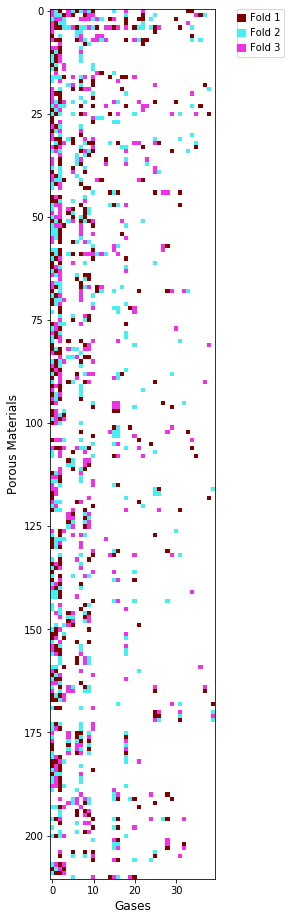

In [10]:
fig = plt.figure(figsize=(12,16))
ax = plt.gca()
#my_cmap = matplotlib.cm.get_cmap('Accent')
mycmap = matplotlib.colors.ListedColormap(np.array([[255/255, 255/255, 255/255, 1], 
                                                    [128/255, 0, 0, 1], 
                                                    [70/255, 240/255, 240/255, 1], 
                                                    [240/255, 50/255, 230/255, 1],
                                                    [60/255, 180/255, 75/255, 1],
                                                    [245/255, 130/255, 48/255, 1]][:len(np.unique(fold_matrix))]))
new_row_order, new_col_order = sort_matrix_by_freq(fold_matrix)
plt.imshow(fold_matrix[new_row_order, :][:, new_col_order], interpolation='none', cmap=mycmap)
custom_points = [matplotlib.lines.Line2D([0], [0], color=mycmap(1), lw=8),
                 matplotlib.lines.Line2D([0], [0], color=mycmap(2), lw=8),
                 matplotlib.lines.Line2D([0], [0], color=mycmap(3), lw=8)]
plt.legend(custom_points, ['Fold 1', 'Fold 2', 'Fold 3'], handlelength=0.1,
           bbox_to_anchor=(1.42,1), borderaxespad=0)
ax.set_xlabel('Gases', fontsize=12)
ax.set_ylabel('Porous Materials', fontsize=12)
#cbar = plt.colorbar()
#cbar.set_label('Fold', fontsize=14, rotation=270, labelpad=25)
#ax.axis('auto')
plt.savefig('pics/foldmatrix.pdf', format='pdf', dpi=300)
plt.show()

### Lets start setting up the Recommender System algorithm

M shape: (2, 211)	G shape: (2, 40)
Train Loss on iteration 0: 1883.9239392983911
-------------
Maximum number of iterations (100) reached.
Final Loss: 348.160


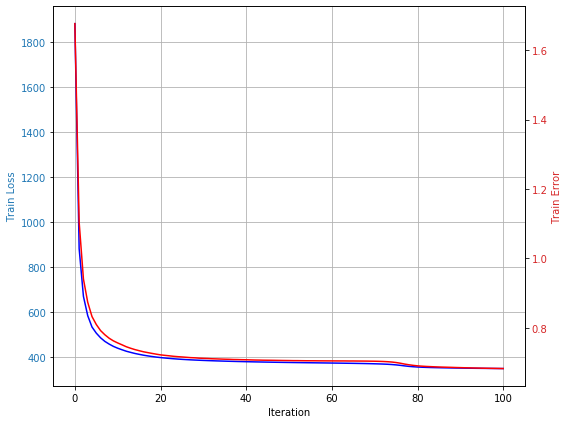

In [11]:
def ALS(henry_matrix, r, lambd, threshold, convergence=1e-6, maxiter=20000, use_global_average=True, verbose=True, plot_latent_space=False):
    n = 0
    train_error_arr = []
    train_error = np.inf
    prev_error = 0
    
    loss_arr = []
    loss = np.inf
    prev_loss = 0
    
    convergence_cnt = 0
    nm = henry_matrix.shape[0]
    ng = henry_matrix.shape[1]
    
        
    M = 0.1*np.random.rand(r, nm)-0.05
    G = 0.1*np.random.rand(r, ng)-0.05
    mu = 0.1*np.random.rand(1, nm)-0.05
    gamma = 0.1*np.random.rand(1, ng)-0.05
    hbar = np.nanmean(henry_matrix) if use_global_average else 0
    Im = lambd[0]/nm * np.identity(r)
    Ig = lambd[0]/ng * np.identity(r)
    bias_lambda = [lambd[1]/nm, lambd[1]/ng]
    
    if verbose:
        print('M shape: {}\tG shape: {}'.format(M.shape, G.shape))
    while loss > threshold:
        
        if n < 50 and plot_latent_space:
            fig1, ax1 = plt.subplots()
            plt.scatter(M[0,:], M[1,:])
            plt.grid()
            ax1.set_title('Material Latent Space: n = {:d}'.format(n))
            plt.show(fig1)
            plt.close(fig1)

            fig2, ax2 = plt.subplots()
            plt.scatter(G[0,:], G[1,:])
            plt.grid()
            ax2.set_title('Gas Latent Space: n = {:d}'.format(n))
            plt.show(fig2)
            plt.close(fig2)

        
        vector_to_pick = [(m, 'm') for m in range(nm)] + [(g, 'g') for g in range(ng)]
        np.random.shuffle(vector_to_pick);
        for vector in vector_to_pick:
            if vector[1] == 'm':
                m = vector[0]
                gases_in_which_H_of_this_mof_is_measured = ~np.isnan(henry_matrix[m,:])
                biased_H = np.reshape(henry_matrix[m, gases_in_which_H_of_this_mof_is_measured] -\
                        (hbar + gamma[0, gases_in_which_H_of_this_mof_is_measured] + mu[0, m]), 
                                      (1, np.sum(gases_in_which_H_of_this_mof_is_measured)))
                b = (G[:, gases_in_which_H_of_this_mof_is_measured]).dot(biased_H.T)
                A = G[:, gases_in_which_H_of_this_mof_is_measured].dot(G[:, gases_in_which_H_of_this_mof_is_measured].T) + Im
                M[:,m] = np.linalg.solve(A,b.flatten())
                mu[0, m] = (np.sum([henry_matrix[m, g] - gamma[0, g] - hbar - M[:,m].T.dot(G[:,g])\
                                         for g in np.arange(ng)[gases_in_which_H_of_this_mof_is_measured]]))\
                                            /(np.sum(gases_in_which_H_of_this_mof_is_measured) + bias_lambda[0])
            else:
                g = vector[0]
                mofs_in_which_H_of_this_gas_is_measured = ~np.isnan(henry_matrix[:,g])
                biased_H = np.reshape(henry_matrix[mofs_in_which_H_of_this_gas_is_measured, g] -\
                    (hbar + mu[0, mofs_in_which_H_of_this_gas_is_measured] + gamma[0, g]),
                                      (np.sum(mofs_in_which_H_of_this_gas_is_measured), 1))
                b = M[:,mofs_in_which_H_of_this_gas_is_measured].dot(biased_H)
                A = M[:,mofs_in_which_H_of_this_gas_is_measured].dot(M[:,mofs_in_which_H_of_this_gas_is_measured].T) + Ig
                G[:,g] = np.linalg.solve(A,b.flatten())
                gamma[0, g] = (np.sum([henry_matrix[m, g] - mu[0, m] - hbar - M[:,m].T.dot(G[:,g])\
                                         for m in np.arange(nm)[mofs_in_which_H_of_this_gas_is_measured]]))\
                                        /(np.sum(mofs_in_which_H_of_this_gas_is_measured) + bias_lambda[1])
        pred = (M.T.dot(G) + hbar + mu.T + gamma)[~np.isnan(henry_matrix)]
        actual = henry_matrix[~np.isnan(henry_matrix)]
        prev_error = train_error
        train_error = np.sqrt(np.sum([(actual - pred)**2])/len(pred))
        train_error_arr.append(train_error)
        error_diff = np.abs(prev_error - train_error)
        prev_loss = loss
        loss = 0.5 * np.sum((henry_matrix[~np.isnan(henry_matrix)] - pred)**2) \
                + 0.5 * lambd[0] * (1/nm * np.sum([np.linalg.norm(M[:,m])**2 for m in range(nm)]) \
                                  + 1/ng * np.sum([np.linalg.norm(G[:,g])**2 for g in range(ng)])) \
                + 0.5 * lambd[1] * (1/nm * np.linalg.norm(mu)**2 \
                                  + 1/ng * np.linalg.norm(gamma)**2)
        loss_arr.append(loss)
        loss_diff = np.abs(prev_loss - loss)
        if n % 1000 == 0:
            if verbose:
                print('Train Loss on iteration {}: {}\n-------------'.format(n, loss))
            
        if loss_diff < convergence:
            convergence_cnt += 1
            if convergence_cnt > 499:
                if verbose:
                    print('Training has converged after {} iterations. See `convergence` parameter for convergence procedure.'.format(n))
                    print('Train loss: {}'.format(loss))
                break
        else:
            convergence_cnt = 0
        n += 1
        if n > maxiter:
            if verbose:
                print('Maximum number of iterations ({}) reached.'.format(maxiter))
                print('Final Loss: {:.3f}'.format(loss_arr[-1]))
            break
        if np.count_nonzero(np.isnan(M)) > 0 or np.count_nonzero(np.isnan(G)) > 0:
            raise Exception('NaN encountered in either latent representation')
    
    if verbose:
        fig, ax = plt.subplots(figsize=(8,6))
        #ax.scatter(np.arange(len(train_error_arr)), train_error_arr, color='red')
        ax.plot(np.arange(len(loss_arr)), loss_arr, color='blue')
        ax.set_xlabel('Iteration')
        ax.set_ylabel('Train Loss', color='tab:blue')
        ax.tick_params(axis='y', labelcolor='tab:blue')
        plt.grid('on')
        
        ax2 = ax.twinx()
        ax2.plot(np.arange(len(train_error_arr)), train_error_arr, color='red')
        ax2.set_ylabel('Train Error', color='tab:red')
        ax2.tick_params(axis='y', labelcolor='tab:red')
        
        plt.tight_layout()
        plt.show()
    
    return M, G, mu, gamma, train_error_arr[-1], loss_arr[-1], hbar
m, g, mb, gb, err, loss, hbar = ALS(log_henry_df.values, 2, [10.0, 5.0], 1e-5, maxiter=100)

Fraction of missing values: 49.81%
averge h test:  0.7923099950871747
average h train:  0.8018724243630149
M shape: (2, 200)	G shape: (2, 200)
Train Loss on iteration 0: 7146.936839725545
-------------
Train Loss on iteration 1000: 24.37142310455607
-------------
Maximum number of iterations (1000) reached.
Final Loss: 24.371


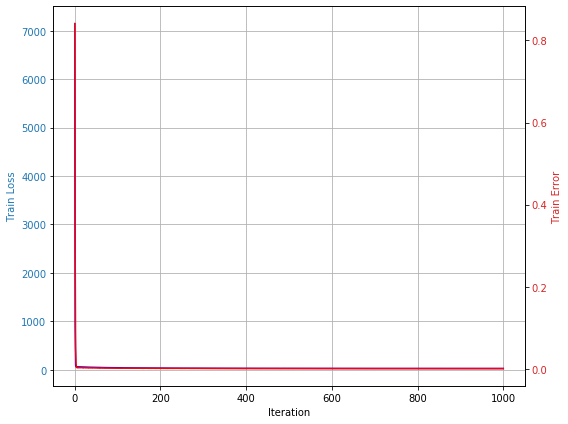

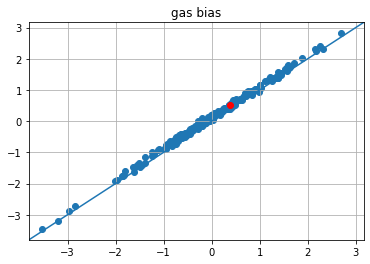

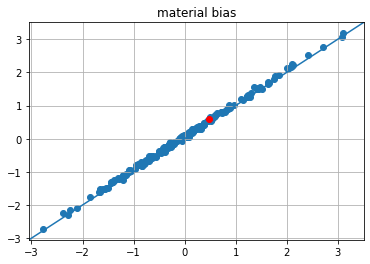

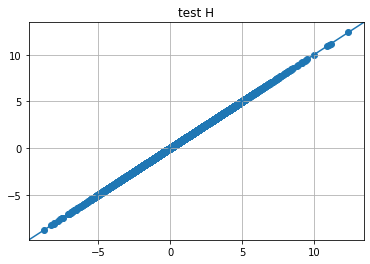

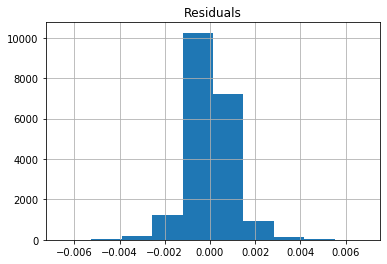

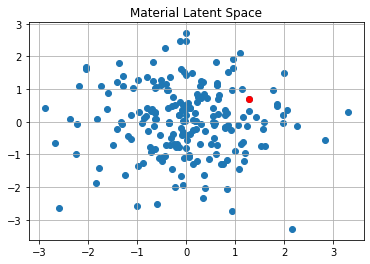

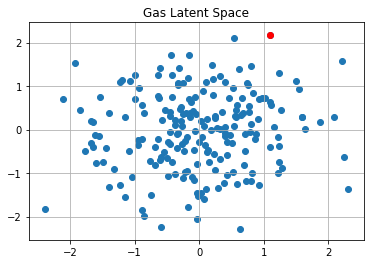

In [12]:
nm = 200
ng = 200
r = 2
M = np.random.randn(r, nm)
G = np.random.randn(r, ng)
gamma = np.random.randn(1, ng)
mu = np.random.randn(1, nm)

H = M.T.dot(G) + gamma + mu.T + 0.6
idx_missing = np.random.randint(0, high=2, size=H.shape) == 0
H_masked = np.copy(H)
H_masked[idx_missing] = np.nan

print('Fraction of missing values: {:.2f}%'.format(100*np.sum(idx_missing)/(nm*ng)))
print("averge h test: ", np.mean(H[idx_missing]))
print("average h train: ", np.mean(H[~idx_missing]))

m, g, mb, gb, err, loss, hbar = ALS(H_masked, r, [10.0, 5], 1e-5, maxiter=1000, 
                                    use_global_average=True, plot_latent_space=False)
H_pred = m.T.dot(g) + gb + mb.T + hbar

random_material = np.random.randint(nm)
random_gas = np.random.randint(ng)

def mk_diagonal():
    lim = ax.get_ylim()
    ax.plot(lim, lim)
    ax.set_xlim(lim)
    ax.set_ylim(lim)
    
fig, ax = plt.subplots()
plt.scatter(gb, gamma)
plt.scatter(gb[0, random_gas], gamma[0, random_gas], c='r', zorder=999)
mk_diagonal()
plt.grid()
ax.set_title("gas bias")
plt.show(fig)

fig, ax = plt.subplots()
plt.scatter(mb, mu)
plt.scatter(mb[0, random_material], mu[0, random_material], c='r', zorder=999)
plt.grid()
mk_diagonal()
ax.set_title("material bias")
plt.show(fig)

fig, ax = plt.subplots()
plt.scatter(H_pred[idx_missing], H[idx_missing])
plt.grid()
mk_diagonal()
ax.set_title("test H")
plt.show(fig)

fig, ax = plt.subplots()
plt.hist(H_pred[idx_missing] - H[idx_missing])
ax.set_title('Residuals')
plt.grid()
plt.show(fig)

fig, ax = plt.subplots()
plt.scatter(m[0,:], m[1,:])
plt.scatter(m[0,random_material], m[1, random_material], c='r', zorder=999)
plt.grid()
ax.set_title('Material Latent Space')
plt.show(fig)

fig, ax = plt.subplots()
plt.scatter(g[0,:], g[1,:])
plt.scatter(g[0, random_gas], g[1, random_gas], c='r', zorder=999)
plt.grid()
ax.set_title('Gas Latent Space')
plt.show(fig)

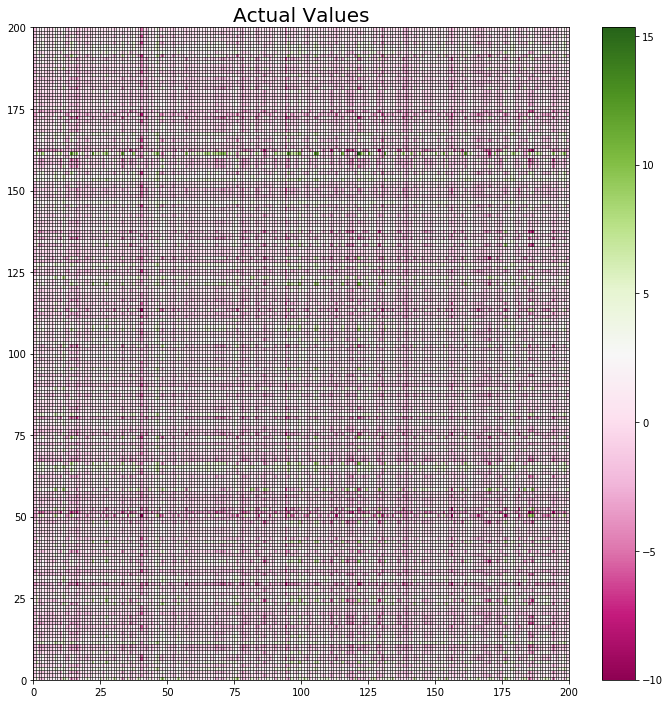

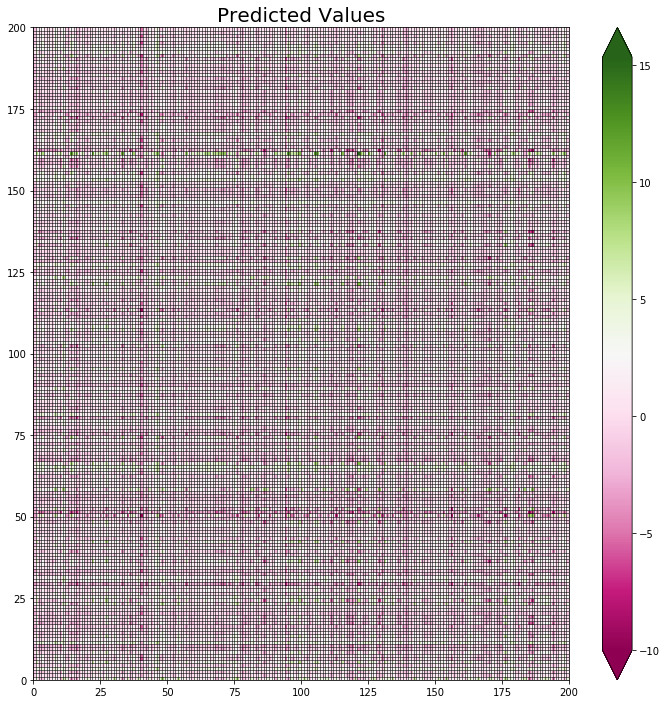

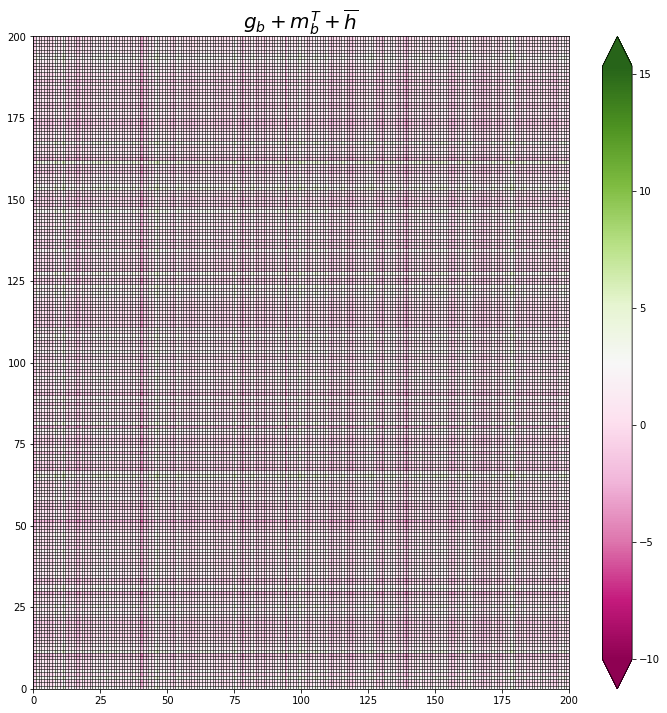

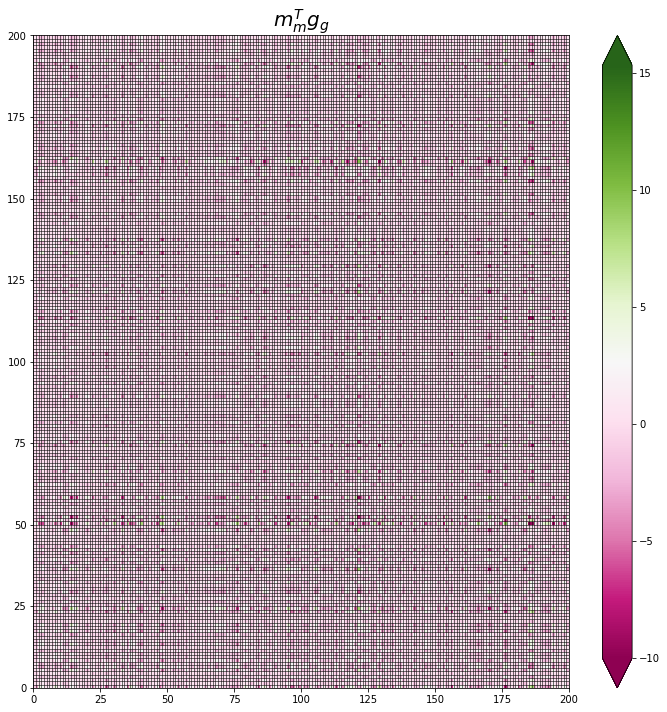

In [13]:
def plot_matrix(matrix, title, cmap_color, size, save=False, colorbar_limits=None):
    nm, ng = matrix.shape
    
    fig, ax = plt.subplots(figsize=(size,size*nm/ng))
    
    if colorbar_limits != None:
        img = ax.pcolormesh(matrix, cmap=cmap_color, 
                  vmin=colorbar_limits[0], vmax=colorbar_limits[1])
    else:
        img = ax.pcolormesh(matrix, cmap=cmap_color)
    
    for y in range(nm):
        ax.plot([0, ng], [y, y], linewidth=0.55, color='k')
    for x in range(ng):
        ax.plot([x, x], [0, nm], linewidth=0.55, color='k')
    
    #cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.025,ax.get_position().height])
    extend_string = 'both' if colorbar_limits != None else 'neither'
    cbar = plt.colorbar(img, extend=extend_string)
    ax.set_title(title, fontsize=20)
    #plt.tight_layout()
    if save:
        plt.savefig(title + '.png', format='png', dpi=300)
    plt.show()
    
    return cbar
actual_cbar = plot_matrix(H, 'Actual Values', 'PiYG', 12)
plot_matrix(H_pred, 'Predicted Values', 'PiYG', 12, False, [actual_cbar.vmin, actual_cbar.vmax])
plot_matrix(gb + mb.T + hbar, '$g_b + m_b^T + \overline{h}$', 'PiYG', 12, False, [actual_cbar.vmin, actual_cbar.vmax])
plot_matrix(m.T.dot(G), '$m^T_mg_g$', 'PiYG', 12, False, [actual_cbar.vmin, actual_cbar.vmax])

In [14]:
def cross_validation(henry_df, fold_matrix, r, lambd):
    k = len(np.unique(fold_matrix))-1
    print('-----------------------------------------\nStarting ALS with the following parameters:\nr = {}, lambda_l = {:.3e}, lambda_b = {:.3e}'.format(r, lambd[0], lambd[1]))
    test_errors = []
    parity_pred = np.full(henry_df.shape, np.nan)
    
    for test_fold in range(k):
        M, G, Mbias, Gbias, train_error, loss, hbar = ALS(henry_df.mask(fold_matrix == test_fold).values, 
                                                          r, lambd, 1e-6, 1e-7, 25, 
                                                          use_global_average=True, verbose=False)
        pred = (M.T.dot(G) + Mbias.T + hbar + Gbias)[fold_matrix == test_fold]
        parity_pred[fold_matrix == test_fold] = pred
        actual = henry_df.values[fold_matrix == test_fold]
        test_errors.append(np.sqrt(np.sum([(actual - pred)**2])/len(actual)))
        #print(train_error)
        #print(test_errors[test_fold])
        #print(actual)
    test_error = np.mean(test_errors)
    print('Test Error: {:.3f}'.format(test_error))
    print('Train Error: {:.3f}'.format(train_error))
    return test_error, Mbias, Gbias, parity_pred, loss, hbar

n_folds = 3
_r = [6]
_lambd_l = np.logspace(2.5, 3, num=20)
_lambd_b = np.logspace(1, 1.5, num=20)
fold_matrix = k_fold_split(log_henry_df, n_folds, max_iter=10000)
CV_dict = {}
gas_mean_parity_pred = np.zeros(log_henry_df.shape)
mof_mean_parity_pred = np.zeros(log_henry_df.shape)

for r in _r:
    for lambd_l in _lambd_l:
        for lambd_b in _lambd_b:
            for test_fold in range(n_folds):
                train_mean_gas = np.mean(log_henry_df.mask(fold_matrix == test_fold), axis=0)
                train_mean_material = np.mean(log_henry_df.mask(fold_matrix == test_fold), axis=1)
                for row in range(log_henry_df.shape[0]):
                    for col in range(log_henry_df.shape[1]):
                        if fold_matrix[row,col] == test_fold:
                            gas_mean_parity_pred[row,col] = train_mean_gas[col]
                            mof_mean_parity_pred[row,col] = train_mean_material[row]
            test_error, Mbias, Gbias, parity_pred, loss, hbar = cross_validation(log_henry_df, fold_matrix, r, [lambd_l, lambd_b])
            cv_key = '{}_{}_{}'.format(r, lambd_l, lambd_b)
            CV_dict['{}_err'.format(cv_key)] = test_error
            CV_dict['{}_pred'.format(cv_key)] = parity_pred
            CV_dict['{}_mbias'.format(cv_key)] = Mbias
            CV_dict['{}_gbias'.format(cv_key)] = Gbias
            CV_dict['{}_r'.format(cv_key)] = r
            CV_dict['{}_lambdal'.format(cv_key)] = lambd_l
            CV_dict['{}_lambdab'.format(cv_key)] = lambd_b
            CV_dict['{}_loss'.format(cv_key)] = loss
            CV_dict['{}_hbar'.format(cv_key)] = hbar
      

Splitting matrix into 3 folds
Number of iterations required to split data into 3-folds: 879
Number of data points in fold 0: 397
Number of data points in fold 1: 394
Number of data points in fold 2: 398
Total number of data points: 1189
-----------------------------------
-----------------------------------------
Starting ALS with the following parameters:
r = 6, lambda_l = 3.162e+02, lambda_b = 1.000e+01
Test Error: 1.885
Train Error: 0.536
-----------------------------------------
Starting ALS with the following parameters:
r = 6, lambda_l = 3.162e+02, lambda_b = 1.062e+01
Test Error: 1.905
Train Error: 0.537
-----------------------------------------
Starting ALS with the following parameters:
r = 6, lambda_l = 3.162e+02, lambda_b = 1.129e+01
Test Error: 1.894
Train Error: 0.538
-----------------------------------------
Starting ALS with the following parameters:
r = 6, lambda_l = 3.162e+02, lambda_b = 1.199e+01
Test Error: 1.903
Train Error: 0.531
-----------------------------------

In [15]:
min_keys = []
for r in _r:
    min_key = "asdf"
    min_err = np.inf
    for key in CV_dict:
        if key.split('_')[-1] != 'err' or key.split('_')[0] != str(r):
            continue
        if type(CV_dict[key]) != np.float64:
            continue
        if CV_dict[key] < min_err:
            min_err = CV_dict[key]
            min_key = key
    min_keys.append(min_key)

min_keys

['6_1000.0_10.624678308940414_err']

In [16]:
# If key is not none, will return floats as results, otherwise, an array of values from CV run
def extract_data_from_CV_dict(CV_dict, key=None, ignore_all_but_heatmap_stuff=True):
    if key:
        if ignore_all_but_heatmap_stuff:
            lambda_l = CV_dict['_'.join(key.split('_')[:-1]) + '_lambdal']
            lambda_b = CV_dict['_'.join(key.split('_')[:-1]) + '_lambdab']
            err = CV_dict['_'.join(key.split('_')[:-1]) + '_err']
            parity_pred = 0
            Mbias = 0
            Gbias = 0
            r = CV_dict['_'.join(key.split('_')[:-1]) + '_r']
            hbar = CV_dict['_'.join(key.split('_')[:-1]) + '_hbar']
        else:
            parity_pred = CV_dict['_'.join(key.split('_')[:-1]) + '_pred']
            Mbias = CV_dict['_'.join(key.split('_')[:-1]) + '_mbias']
            Gbias = CV_dict['_'.join(key.split('_')[:-1]) + '_gbias']
            r = CV_dict['_'.join(key.split('_')[:-1]) + '_r']
            lambda_l = CV_dict['_'.join(key.split('_')[:-1]) + '_lambdal']
            lambda_b = CV_dict['_'.join(key.split('_')[:-1]) + '_lambdab']
            err = CV_dict['_'.join(key.split('_')[:-1]) + '_err']
            hbar = CV_dict['_'.join(key.split('_')[:-1]) + '_hbar']
    else:
        if ignore_all_but_heatmap_stuff:
            parity_pred = 0
            Mbias = 0
            Gbias = 0
            r = np.array([], dtype=np.int)
            lambda_l = np.array([])
            lambda_b = np.array([])
            err = np.array([])
            hbar = np.array([])
        else:
            parity_pred = np.array([])
            Mbias = np.array([])
            Gbias = np.array([])
            r = np.array([], dtype=np.int)
            lambda_l = np.array([])
            lambda_b = np.array([])
            err = np.array([])
            hbar = np.array([])

        for _key in CV_dict.keys():
            if not ignore_all_but_heatmap_stuff:
                parity_pred = np.append(parity_pred, CV_dict['_'.join(_key.split('_')[:-1]) + '_pred'])
                Mbias = np.append(Mbias, CV_dict['_'.join(_key.split('_')[:-1]) + '_mbias'])
                Gbias = np.append(Gbias, CV_dict['_'.join(_key.split('_')[:-1]) + '_gbias'])
            r = np.append(r, CV_dict['_'.join(_key.split('_')[:-1]) + '_r'])
            lambda_l = np.append(lambda_l, CV_dict['_'.join(_key.split('_')[:-1]) + '_lambdal'])
            lambda_b = np.append(lambda_b, CV_dict['_'.join(_key.split('_')[:-1]) + '_lambdab'])
            err = np.append(err, CV_dict['_'.join(_key.split('_')[:-1]) + '_err'])
            hbar = np.append(hbar, CV_dict['_'.join(_key.split('_')[:-1]) + '_hbar'])
    return parity_pred, Mbias, Gbias, r, lambda_l, lambda_b, err, hbar
parity_pred, Mbias, Gbias, r, lambda_l, lambda_b, err, hbar = extract_data_from_CV_dict(CV_dict, key=min_keys[0])

M shape: (6, 211)	G shape: (6, 40)
Train Loss on iteration 0: 1552.2908271470797
-------------
Train Loss on iteration 1000: 89.31726939159557
-------------
Train Loss on iteration 2000: 89.27181060958503
-------------
Train Loss on iteration 3000: 89.2599156652384
-------------
Train Loss on iteration 4000: 89.25671159653515
-------------
Train Loss on iteration 5000: 89.25584803574482
-------------
Train Loss on iteration 6000: 89.25561518157829
-------------
Training has converged after 6646 iterations. See `convergence` parameter for convergence procedure.
Train loss: 89.25556607008343


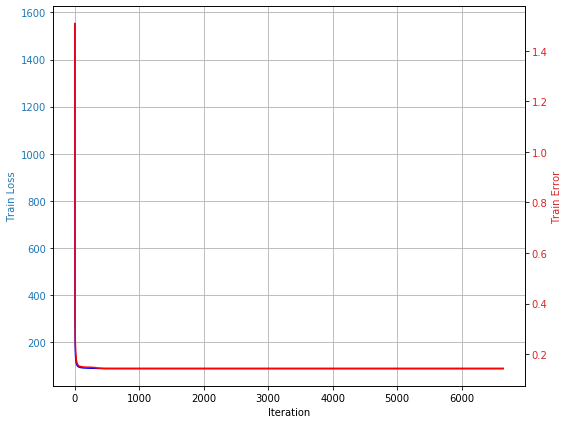

In [17]:
M, G, Mbias, Gbias, train_error, loss, hbar = ALS(log_henry_df.values, r, [28.5, 0.5], 1e-6, 1e-7, 10000, use_global_average=True, verbose=True)

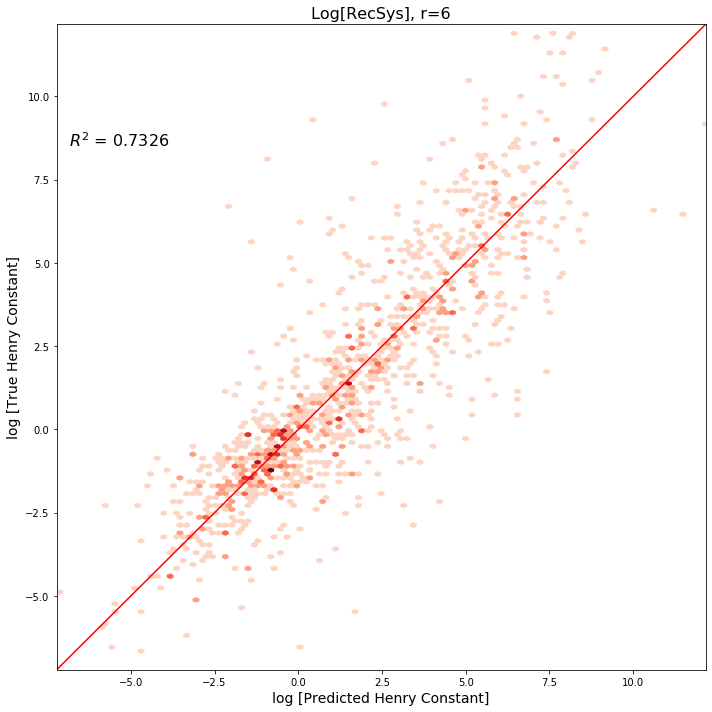

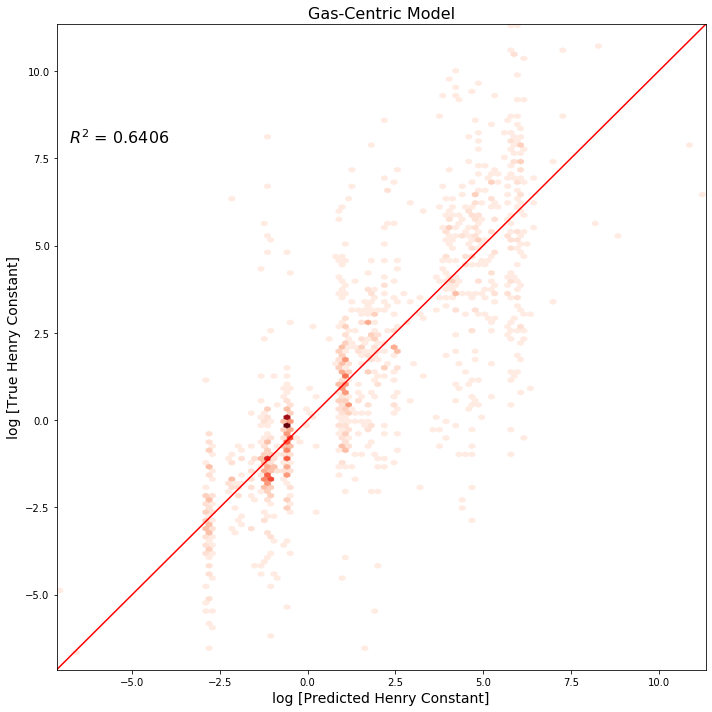

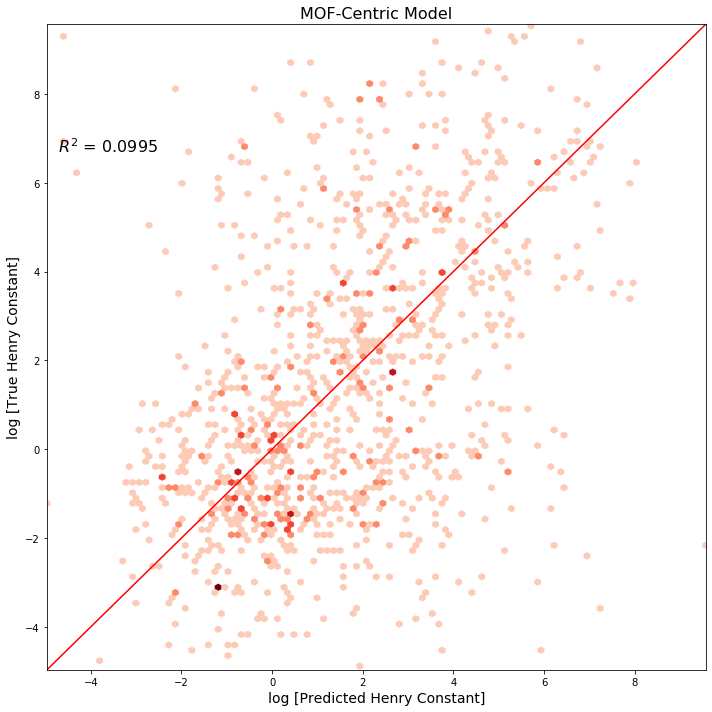

In [18]:
def parity_plot(actual, parity_pred, title):
    fig, ax = plt.subplots(figsize=(10,10))
    
    prediction = parity_pred.flatten()
    actual = actual.values.flatten()
    mask = ~np.isnan(actual)
    
    # Here a colormap was rigged so the background of the parity plots would be transparent
    my_cmap = plt.cm.get_cmap('Reds')
    colors = my_cmap(np.arange(my_cmap.N))
    colors[0,3] = 0.0
    my_cmap = matplotlib.colors.ListedColormap(colors)

    test_mean = np.nanmean(actual)
    R_squared = 1 - (np.sum([(actual[i] - prediction[i])**2 for i in np.arange(len(actual))[mask]]) / np.sum([(actual[i] - test_mean)**2 for i in np.arange(len(actual))[mask]]))
    ax.hexbin(prediction[mask], actual[mask], gridsize=(100,100), cmap=my_cmap, linewidth=0.25)
    #ax.scatter(prediction[mask], actual[mask])
    #lim = [-10, 10]
    
    lim = [np.max([np.min(actual[mask]), np.min(prediction[mask])]), np.min([np.max(actual[mask]), np.max(prediction[mask])])]
    
    ax.plot(lim, lim, c='r')
    ax.set_xlabel('log [Predicted Henry Constant]', fontsize=14)
    ax.set_ylabel('log [True Henry Constant]', fontsize=14)
    ax.set_xlim(lim)
    ax.set_ylim(lim)
    ax.text(lim[0]*0.95, lim[1]*0.7, '$R^2$ = {:.4f}'.format(R_squared), fontsize=16)
    ax.set_title(title, fontsize=16)
    plt.tight_layout()
    plt.savefig('pics/' + title + '.pdf', format='pdf', dpi=300)
    
    plt.show()
for min_key in min_keys:
    parity_pred, Mbias, Gbias, r, lambda_l, lambda_b, err, hbar = extract_data_from_CV_dict(CV_dict, key=min_key, ignore_all_but_heatmap_stuff=False)
    parity_plot(log_henry_df, parity_pred, 'Log[RecSys], r={}'.format(r))
parity_plot(log_henry_df, gas_mean_parity_pred, 'Gas-Centric Model')
parity_plot(log_henry_df, mof_mean_parity_pred, 'MOF-Centric Model')

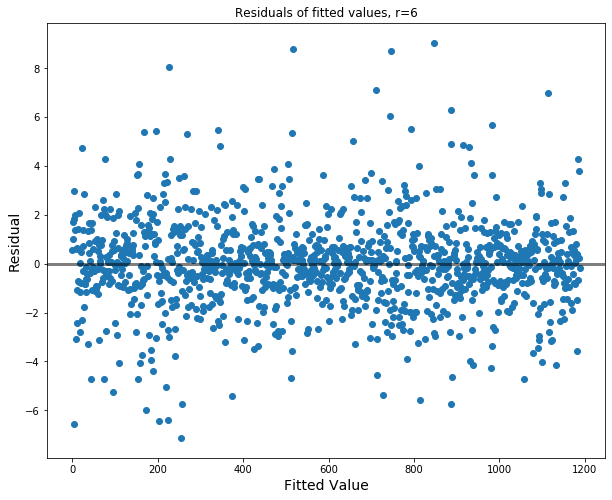

In [19]:
def plot_residuals(actual, parity_pred, title):
    fig, ax = plt.subplots(figsize=(10,8))
    mask = ~np.isnan(actual.flatten())
    residuals = actual.flatten()[mask] - parity_pred.flatten()[mask]
    ax.scatter(np.arange(len(residuals)), residuals)
    lim = ax.get_xlim()
    ax.plot([-100, 2*lim[1]], [0,0], color='k', linewidth=3, alpha=0.5)
    ax.set_xlim(lim)
    ax.set_xlabel('Fitted Value', fontsize=14)
    ax.set_ylabel('Residual', fontsize=14)
    ax.set_title(title)
    plt.show()
for min_key in min_keys:
    parity_pred, Mbias, Gbias, r, lambda_l, lambda_b, err, hbar = extract_data_from_CV_dict(CV_dict, key=min_key, ignore_all_but_heatmap_stuff=False)
    plot_residuals(log_henry_df.values, parity_pred, 'Residuals of fitted values, r={}'.format(r))

In [23]:
fancy_text = {material: material for material in materials}
fancy_text['Zn(II)-MOF [Zn(HPylmDC)(DMA)]n']

'Zn(II)-MOF [Zn(HPylmDC)(DMA)]n'

In [26]:
fancy_text['Fe2(dobdc)'] = 'Fe$_2$(dobdc)'
fancy_text['Ni2(m-dobdc)'] = 'Ni$_2$(m-dobdc)'
fancy_text['Co2(m-dobdc)'] = 'Co$_2$(m-dobdc)'
fancy_text['Mn2(m-dobdc)'] = 'Mn$_2$(m-dobdc)'
fancy_text['Co2(dhtp)'] = 'Co$_2$(dhtp)'
fancy_text['Zn(II)-MOF [Zn(HPylmDC)(DMA)]n'] = 'Zn(II)-MOF [Zn(HPylmDC)(DMA)]$_n$'
fancy_text['[Co2(ndc)2(bpy)]'] = '[Co$_2$(ndc)$_2$(bpy)]'
fancy_text['{[Cu2(4-pmpmd)2(CH3OH)4(opd)2]*2H2O}'] = '{[Cu$_2$(4-pmpmd)$_2$(CH$_3$OH)$_4$(opd)$_2$]*2H$_2$O}'
fancy_text['[{Zn(L)(H2O)2}(NO3)2*2H2O]n'] = '[{Zn(L)(H$_2$O)$_2$}(NO$_3$)$_2$*2H$_2$O]$_n$'
fancy_text['C115.5H202N14O43Zn4'] = 'C$_{115.5}$H$_{202}$N$_{14}$O$_{43}$Zn$_4$'
fancy_text['{[Zn2(bpdc)2(azpy)]*2H2O*2DMF}n'] = '{[Zn$_2$(bpdc)$_2$(azpy)]*2H$_2$O*2DMF}$_n$'
fancy_text['C62H50Cd3K2N2O26'] = 'C$_{62}$H$_{50}$Cd$_3$K$_2$N$_2$O$_{26}$'
fancy_text['Yb(BPT)(H2O)*(DMF)1.5(H2O)1.25'] = 'Yb(BPT)(H$_2$O)*(DMF)$_{1.5}$(H$_2$O)$_{1.25}$'
fancy_text['{[Ni(bpe)2(N(CN)2)](N(CN)2)}n'] = '{[Ni(bpe)$_2$(N(CN)$_2$)](N(CN)$_2$)}$_n$'

r = 6


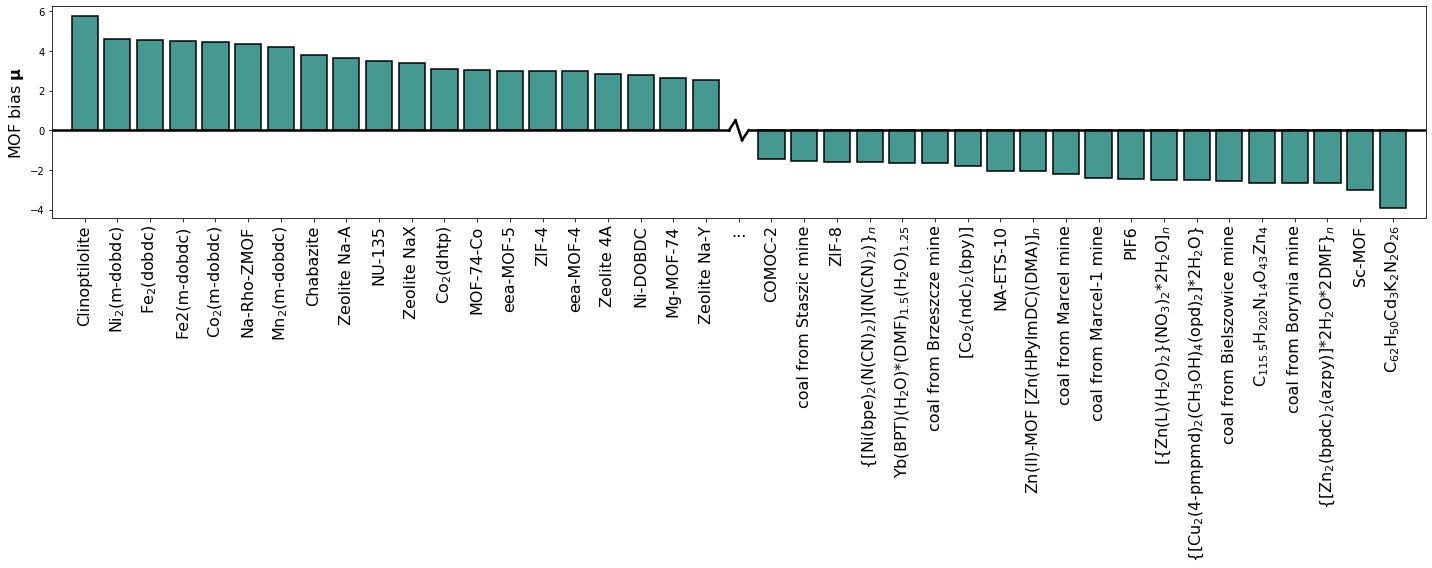

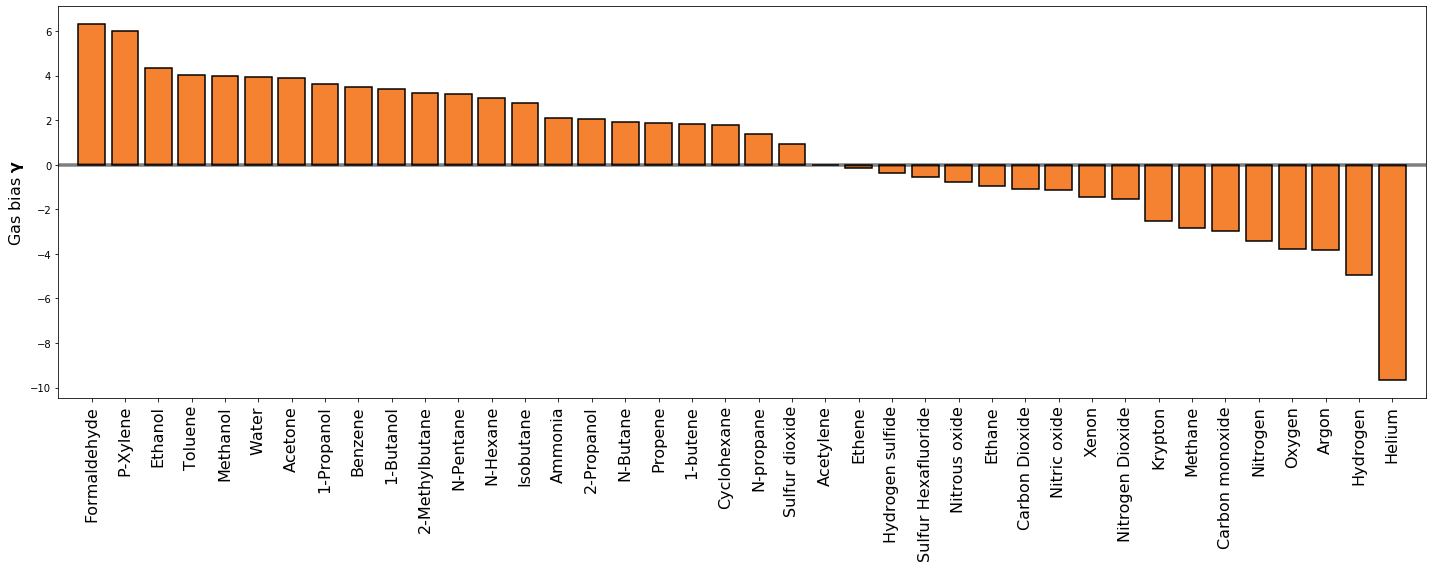

In [27]:
def plot_biases(bias, hbar, mof_or_gas):
    N = len(bias[0,:])
    sorted_idx = np.argsort(bias)[0,::-1]
    color = '#469990' if mof_or_gas == 'MOF' else '#f58231'
    if N > 40:
        fig, ax = plt.subplots(figsize=(20,8))
        ax.bar(range(20), bias[0,sorted_idx][:20], 0.8, linewidth=1.5, label='Bias', color=color, edgecolor='k')
        ax.bar(range(21, 41), bias[0,sorted_idx][-20:], 0.8, linewidth=1.5, label='Bias', color=color, edgecolor='k')
        ax.plot([-1, 19.7], [0, 0], c='k', lw=2.5)
        ax.plot([20.3, 41], [0, 0], c='k', lw=2.5)
        ax.plot([19.7, 19.9], [0, 0.5], c='k', lw=2.5)
        ax.plot([19.9, 20.1], [0.5, -0.5], c='k', lw=2.5)
        ax.plot([20.1, 20.3], [-0.5, 0], c='k', lw=2.5)
        ax.set_xlim(-1, 41)
    else:
        fig, ax = plt.subplots(figsize=(20,8))
        ax.bar(np.arange(N), bias[0,sorted_idx], 0.8, linewidth=1.5, label='Bias', color='#f58231', edgecolor='k')
        xlim = ax.get_xlim()
        ax.plot(xlim, [0, 0], c='k', lw=3.5, alpha=0.5)
        ax.set_xlim(-1, N)
    
    
    
    ylabel = 'MOF bias $\mathbf{\mu}$' if mof_or_gas == 'MOF' else 'Gas bias $\mathbf{\gamma}$'
    ax.set_ylabel(ylabel, fontsize=16)
    if mof_or_gas == 'MOF':
        xlabels = [fancy_text[key_to_material[material]] for material in log_henry_df.index[sorted_idx]]
    else:
        xlabels = [key_to_gas[gas.split('_')[0]] for gas in log_henry_df.columns[sorted_idx]]
    if N > 40:
        ax.set_xticks(range(41))
        ax.set_xticklabels(xlabels[:20] + ['...'] + xlabels[-20:], rotation=90, fontsize=16)
        for tick in ax.get_xticklabels():
            if tick.get_text() == '...':
                tick.set_rotation(0)
    else:
        ax.set_xticks(np.arange(len(xlabels)))
        ax.set_xticklabels(xlabels, rotation=90, fontsize=16)
    #ax.set_title(mof_or_gas + ' biases from RecSys model', fontsize=16)
    plt.tight_layout()
    plt.savefig('pics/' + mof_or_gas + '_biases_plot.pdf', format='pdf', dpi=300)
    plt.show()
for min_key in min_keys:
    parity_pred, train_Mbias, train_Gbias, r, lambda_l, lambda_b, train_err, train_hbar = extract_data_from_CV_dict(CV_dict, key=min_key)
    print('r = {:d}'.format(r))
    M, G, Mbias, Gbias, train_error, loss, hbar = ALS(log_henry_df.values, r, [lambda_l, lambda_b], 1e-6, 1e-7, 50000, use_global_average=True, verbose=False)
    plot_biases(Mbias, hbar, 'MOF')
    plot_biases(Gbias, hbar, 'Gas')

In [ ]:
#for min_key in min_keys:
#    parity_pred, train_Mbias, train_Gbias, r, lambda_l, lambda_b, train_err, train_hbar = extract_data_from_CV_dict(CV_dict, key=min_key)
#    M, G, Mbias, Gbias, train_error, loss, hbar = ALS(log_henry_df.values, r, [lambda_l, lambda_b], 1e-6, 1e-7, 50000, use_global_average=True, verbose=False)

#    MG_component = M.T.dot(G)
#    H = MG_component + Mbias.T + hbar + Gbias

#    fig, ax = plt.subplots(figsize=(10,8))
#    ax.hist(MG_component.flatten(), bins=50)
#    ax.set_xlabel('M.T.dot(G)', fontsize=14)
#    ax.set_ylabel('Frequency', fontsize=14)
#    ax.set_title('r = {:s}'.format(min_key.split('_')[0]), fontsize=16)
#    plt.tight_layout()
#    plt.show()   
    
#    MG_frac = MG_component.flatten() / H.flatten()
#    fig, ax = plt.subplots(figsize=(10,8))
#    ax.hist(MG_frac, bins=np.linspace(0, stop=10, num=100))
#    ax.set_xlabel('Fraction of M.T.dot(G) of H', fontsize=14)
#    ax.set_ylabel('Frequency', fontsize=14)
#    ax.set_title('r = {:s}'.format(min_key.split('_')[0]), fontsize=16)
#    plt.tight_layout()
#    plt.show()   

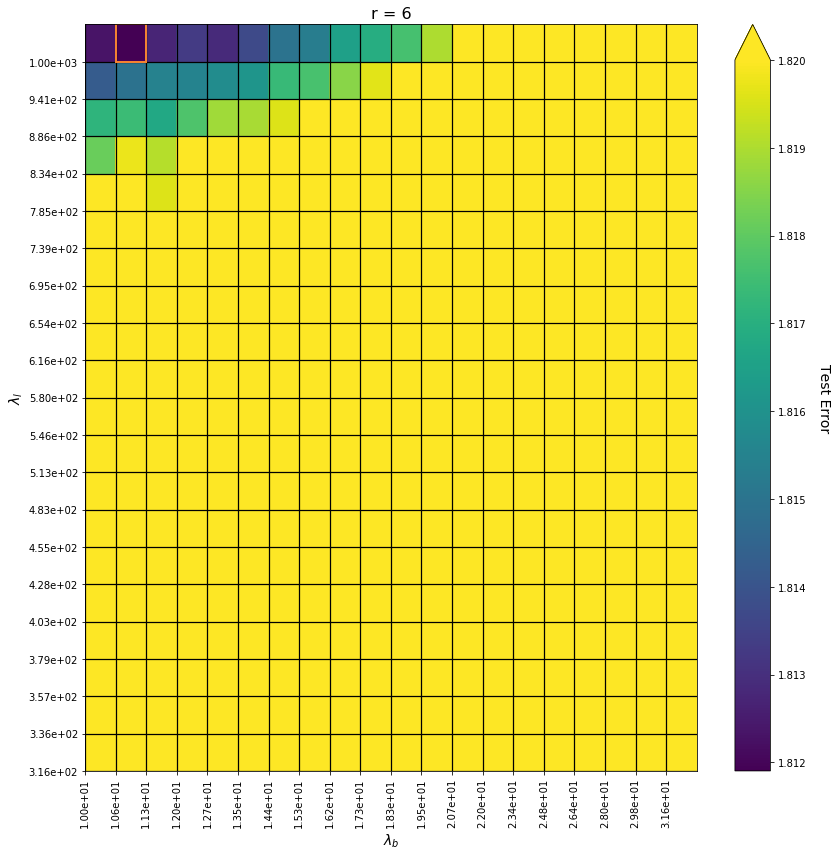

In [28]:
# If there are more than one `r` in CV_dict, specify it. Otherwise, tries to use all data and throws an error with multiple `r`s
def create_loss_heatmap(CV_dict, r_val=None, clip_value=np.inf):
    parity_pred, Mbias, Gbias, r, lambda_l, lambda_b, err, hbar = extract_data_from_CV_dict(CV_dict)
    if r_val==None:
        assert all(r[0] == r)
        correct_r_vals = np.full(r.shape, True)
    else:
        correct_r_vals = (r == r_val)
    
    loss_matrix = np.zeros((len(np.unique(lambda_l)), len(np.unique(lambda_b))))
    unique_lambda_l = np.unique(lambda_l)
    unique_lambda_b = np.unique(lambda_b)
    N = len(lambda_l)
    for i in range(N):
        if not correct_r_vals[i]:
            continue
        idx1 = np.argwhere(lambda_l[i] == unique_lambda_l)
        idx2 = np.argwhere(lambda_b[i] == unique_lambda_b)
        loss_matrix[idx1, idx2] = err[i]
    
    min_key = "asdf"
    min_err = np.inf
    for key in CV_dict:
        if key.split('_')[-1] != 'err' or key.split('_')[0] != str(r_val):
            continue
        if type(CV_dict[key]) != np.float64:
            continue
        if CV_dict[key] < min_err:
            min_err = CV_dict[key]
            min_key = key
    min_lambda_l = CV_dict['_'.join(min_key.split('_')[:-1]) + '_lambdal']
    min_lambda_b = CV_dict['_'.join(min_key.split('_')[:-1]) + '_lambdab']
    
    
    fig, ax = plt.subplots(figsize=(12,12))
    im = ax.pcolormesh(np.clip(loss_matrix, -np.inf, clip_value), 
                   cmap='viridis')
    
    for y in range(loss_matrix.shape[0]):
        plt.plot([0, loss_matrix.shape[1]], [y, y], linewidth=1.25, color='k')
    for x in range(loss_matrix.shape[1]):
        plt.plot([x, x], [0, loss_matrix.shape[0]], linewidth=1.25, color='k')

    idx1 = np.argwhere(min_lambda_l == unique_lambda_l)[0][0]
    idx2 = np.argwhere(min_lambda_b == unique_lambda_b)[0][0]
    plt.plot([idx2, idx2], [idx1, idx1+1], linewidth=2.00, color='#f58231')
    plt.plot([idx2+1, idx2+1], [idx1, idx1+1], linewidth=2.00, color='#f58231')
    plt.plot([idx2, idx2+1], [idx1, idx1], linewidth=2.00, color='#f58231')
    plt.plot([idx2, idx2+1], [idx1+1, idx1+1], linewidth=2.00, color='#f58231')
    
    extend_string = 'max' if clip_value < np.inf else 'neither'
    cbar = plt.colorbar(im, extend=extend_string)
    cbar.set_label('Test Error', fontsize=14, rotation=270, labelpad=25)
    
    ax.set_xlabel(r'$\lambda_b$', fontsize=14)
    ax.set_ylabel(r'$\lambda_l$', fontsize=14)
    ax.set_xticks(np.arange(len(unique_lambda_l)))
    ax.set_yticks(np.arange(len(unique_lambda_b)))
    z = ax.get_xticklabels()
    ax.set_xticklabels(['{0:.2e}'.format(x) for x in unique_lambda_b], rotation=90)
    ax.set_yticklabels(['{0:.2e}'.format(x) for x in unique_lambda_l])
    ax.set_title('r = {:d}'.format(r_val), fontsize=16)
    plt.tight_layout()
    plt.savefig('loss_heatmap.pdf', format='pdf', dpi=300)
    plt.show()
    return loss_matrix

#loss_matrix = create_loss_heatmap(CV_dict, r_val=0, clip_value=1.95)
#loss_matrix = create_loss_heatmap(CV_dict, r_val=1, clip_value=1.95)
#loss_matrix = create_loss_heatmap(CV_dict, r_val=2, clip_value=1.95)
#loss_matrix = create_loss_heatmap(CV_dict, r_val=4, clip_value=1.95)
loss_matrix = create_loss_heatmap(CV_dict, r_val=6, clip_value=1.82)

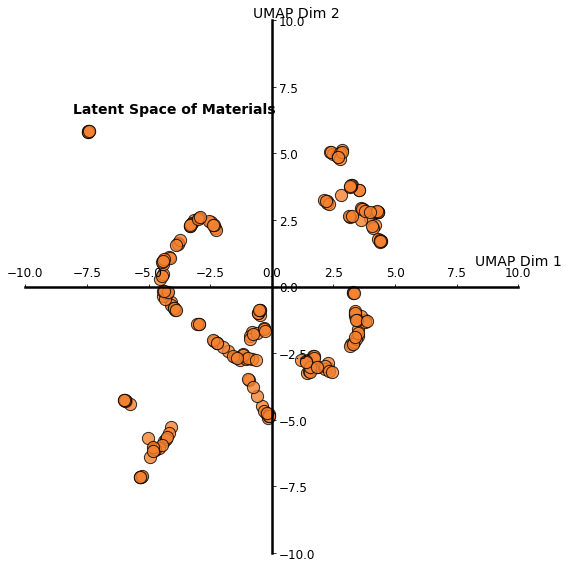

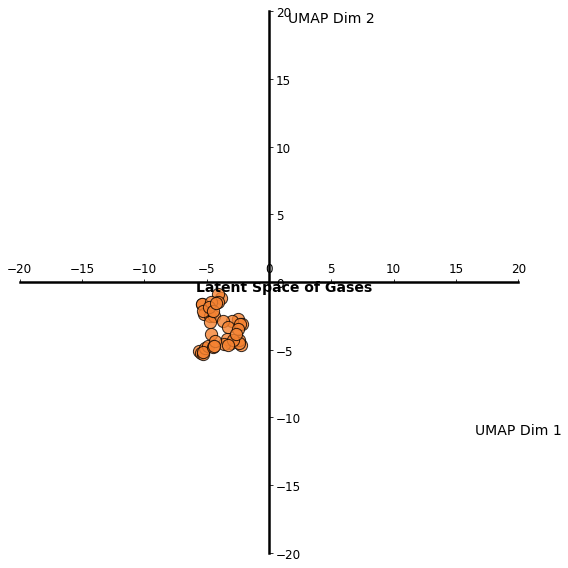

In [29]:
def plot_2d_latent_space(M_or_G, title, filename, xlim, ylim, label_coords):
    if M_or_G.shape[0] == 2:
        fig, ax = plt.subplots(figsize=(8,8))

        #ax.scatter(M_or_G[0,:], M_or_G[1,:], s=150, c='#469990', alpha=0.8, edgecolor='k')
        ax.scatter(M_or_G[0,:], M_or_G[1,:], s=150, c='#f58231', alpha=0.8, edgecolor='k')
        ax.set_xlabel('Latent Dim 1', fontsize=14)
        ax.set_ylabel('Latent Dim 2', fontsize=14, rotation=0)
        ax.yaxis.tick_right()
        ax.yaxis.set_ticks_position('right')
        ax.yaxis.set_label_position('left')
        ax.xaxis.tick_bottom()
        ax.xaxis.set_ticks_position('top')
        ax.xaxis.set_label_position('bottom')
        ax.spines['right'].set_position('zero')
        ax.spines['left'].set_color('none')
        ax.spines['top'].set_position('zero')
        ax.spines['bottom'].set_color('none')
        ax.set_axisbelow(False)
        ax.spines['right'].set_linewidth(2.5)
        ax.spines['top'].set_linewidth(2.5)
        ax.xaxis.set_label_coords(label_coords[0,0], label_coords[0,1])
        ax.yaxis.set_label_coords(label_coords[1,0], label_coords[1,1])

        plt.tick_params(labelsize=12)

        ax.text(ax.get_xlim()[0], ax.get_ylim()[1], title, fontsize=14, weight='bold')
        #ax.set_title(title)
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)
        plt.tight_layout()
        plt.savefig('pics/' + filename, dpi=300, format='png')
        plt.show()
    elif M_or_G.shape[0] > 2:
        embedding = umap.UMAP(n_neighbors=5, min_dist=0.001).fit_transform(M_or_G.T)
        fig, ax = plt.subplots(figsize=(8,8))
        
        ax.scatter(embedding[:,0], embedding[:,1], s=150, c='#f58231', alpha=0.8, edgecolor='k')
        ax.set_xlabel('UMAP Dim 1', fontsize=14)
        ax.set_ylabel('UMAP Dim 2', fontsize=14, rotation=0)
        ax.yaxis.tick_right()
        ax.yaxis.set_ticks_position('right')
        ax.yaxis.set_label_position('left')
        ax.xaxis.tick_bottom()
        ax.xaxis.set_ticks_position('top')
        ax.xaxis.set_label_position('bottom')
        ax.spines['right'].set_position('zero')
        ax.spines['left'].set_color('none')
        ax.spines['top'].set_position('zero')
        ax.spines['bottom'].set_color('none')
        ax.set_axisbelow(False)
        ax.spines['right'].set_linewidth(2.5)
        ax.spines['top'].set_linewidth(2.5)
        ax.xaxis.set_label_coords(label_coords[0,0], label_coords[0,1])
        ax.yaxis.set_label_coords(label_coords[1,0], label_coords[1,1])

        plt.tick_params(labelsize=12)

        ax.text(ax.get_xlim()[0], ax.get_ylim()[1], title, fontsize=14, weight='bold')
        #ax.set_title(title)
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)
        plt.tight_layout()
        plt.savefig('pics/' + filename, dpi=300, format='png')
        plt.show()
    else:
        fig, ax = plt.subplots(figsize=(8,8))
        
        ax.scatter(np.arange(M_or_G.shape[1]), M_or_G[0,:], s=150, c='#469990', alpha=0.8, edgecolor='k')
        xlim = ax.get_xlim()
        ax.plot([-10, 2000], [0,0], c='k')
        ax.set_xlim(xlim)
        #ax.set_ylabel('Latent Dim', fontsize=14, rotation=0)
        plt.tight_layout()
        plt.savefig('pics/' + filename, dpi=300, format='png')
        plt.show()
    return
parity_pred, train_Mbias, train_Gbias, r, lambda_l, lambda_b, train_err, train_hbar = extract_data_from_CV_dict(CV_dict, key=min_keys[-1])
M, G, Mbias, Gbias, train_error, loss, hbar = ALS(log_henry_df.values, r, [lambda_l, lambda_b], 1e-6, 1e-7, 50000, use_global_average=True, verbose=False)
plot_2d_latent_space(M, 'Latent Space of Materials', 'mof_latent_space.pdf', [-10, 10], [-10, 10], np.array([[1, 0.56], [0.55, 1]]))
plot_2d_latent_space(G, 'Latent Space of Gases', 'gas_latent_space.pdf', [-20, 20], [-20, 20], np.array([[1, 0.24], [0.625, 0.975]]))

#parity_pred, train_Mbias, train_Gbias, r, lambda_l, lambda_b, train_err, train_hbar = extract_data_from_CV_dict(CV_dict, key=min_keys[1])
#M, G, Mbias, Gbias, train_error, loss, hbar = ALS(log_henry_df.values, r, [lambda_l, lambda_b], 1e-6, 1e-7, 50000, use_global_average=True, verbose=False)
#plot_2d_latent_space(M, 'Latent Space of Materials', 'mof_1d_latent_space.pdf', [-2, 2], [-2, 2], np.array([[1, 0.56], [0.55, 1]]))
#plot_2d_latent_space(G, 'Latent Space of Gases', 'gas_1d_latent_space.pdf', [-2, 2], [-2, 2], np.array([[1, 0.24], [0.625, 0.975]]))

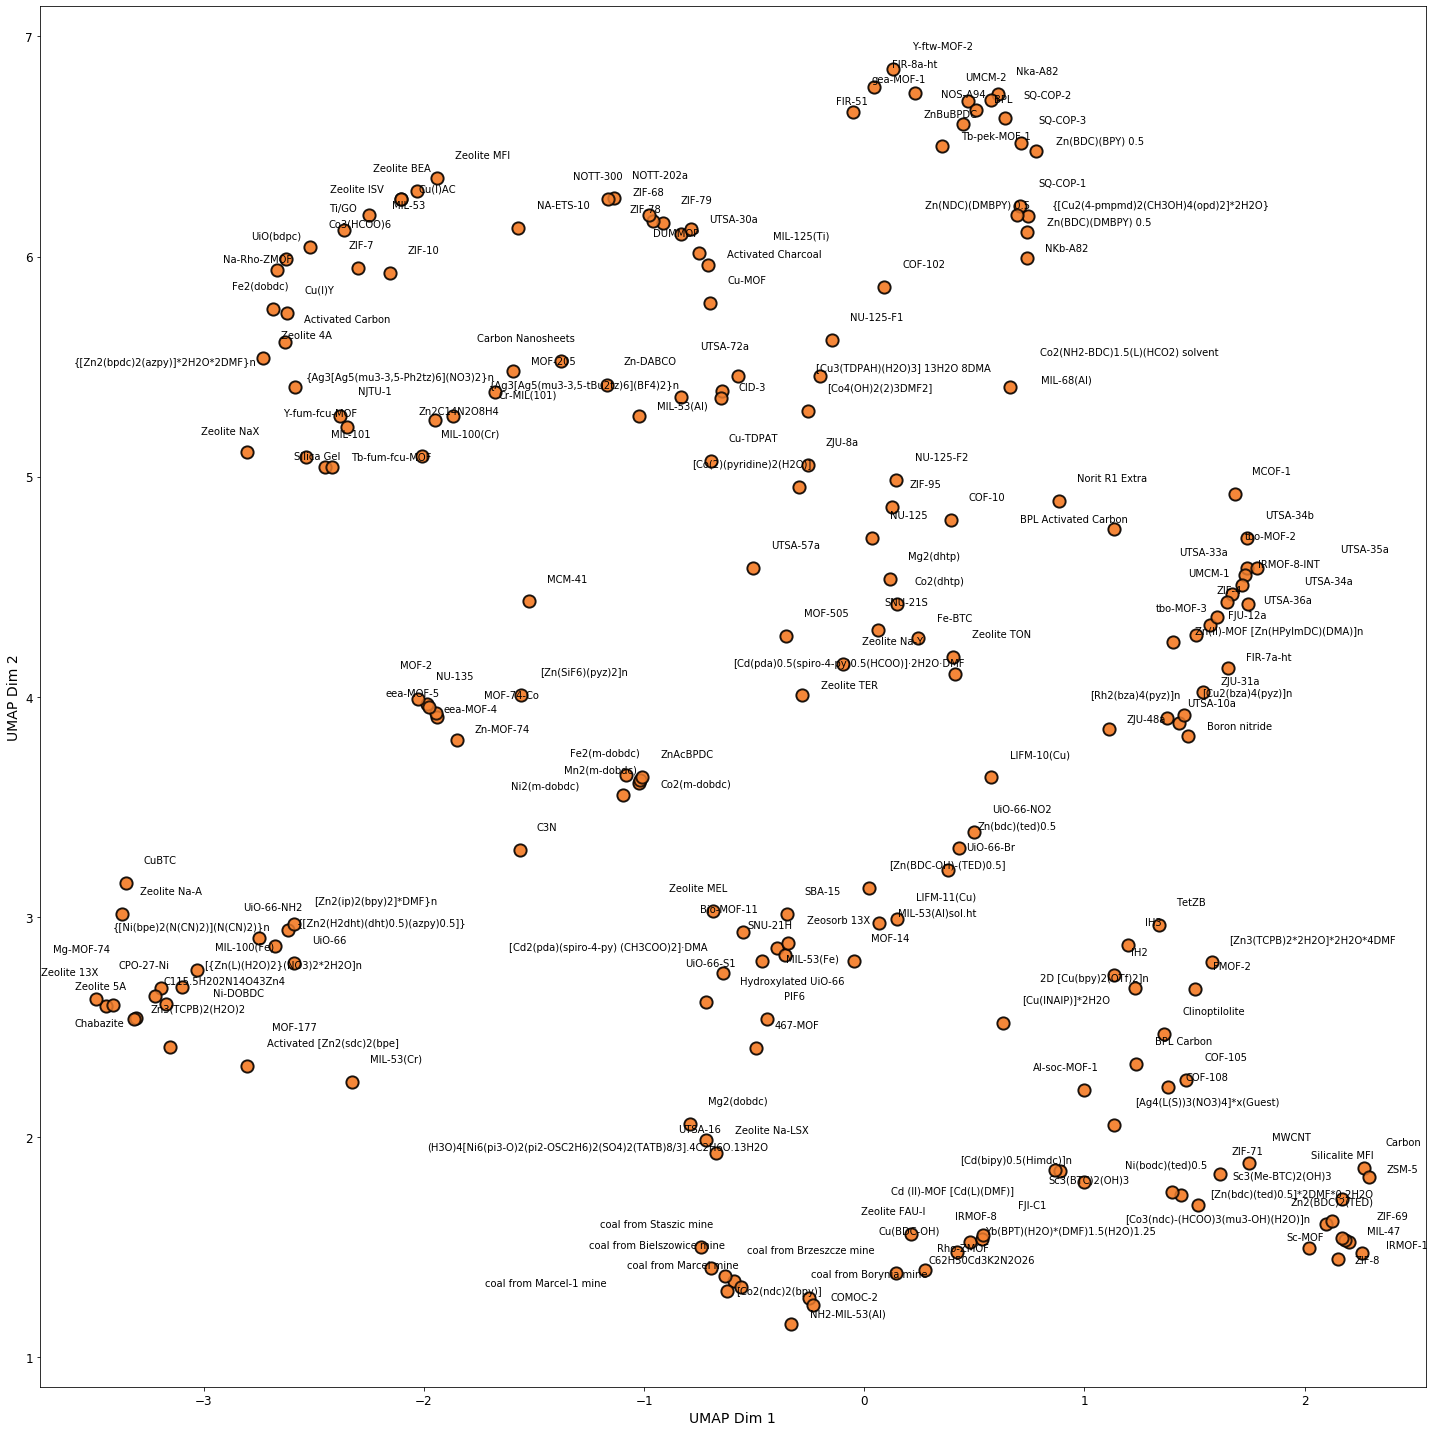

In [30]:
def plot_2d_mof_latent_space_w_labels(M, xlim, ylim, label_coords, circle_around, circle_radius, label_inside_circle=True):
    assert circle_around in materials
    circle_index = np.where(circle_around == materials)[0][0]
    fig, ax = plt.subplots(figsize=(20,20))
    ax.axis('equal')
    if M.shape[0] == 2:
        ax.scatter(M[0,:], M[1,:], s=150, c='#f58231', alpha=0.8, edgecolor='k')
        circle = Circle((M[0, circle_index], M[1, circle_index]), circle_radius, facecolor='none',
                edgecolor='k', linewidth=3, alpha=0.75)
        #ax.add_patch(circle)
        ax.set_xlabel('Latent Dim 1', fontsize=14)
        ax.set_ylabel('Latent Dim 2', fontsize=14, rotation=0)
    elif M.shape[0] > 2:
        embedding = umap.UMAP(n_neighbors=15, min_dist=0.0, metric='euclidean').fit_transform(M.T)
        ax.scatter(embedding[:,0], embedding[:,1], s=150, c='#f58231', alpha=0.8, edgecolor='k')
        
        circle = Circle((embedding[circle_index, 0], embedding[circle_index, 1]), circle_radius, facecolor='none',
                edgecolor='k', linewidth=3, alpha=0.75)
        #ax.add_patch(circle)
        label_indices = []
        #ax.set_xlim([embedding[circle_index, 0]-circle_radius, embedding[circle_index,0]+circle_radius])
        #ax.set_ylim([embedding[circle_index, 1]-circle_radius, embedding[circle_index,1]+circle_radius])
        
        for i in range(len(materials)):
            if np.linalg.norm(embedding[i, :] - embedding[circle_index, :]) <= circle_radius:
                ax.scatter(embedding[i, 0], embedding[i, 1], s=150, c='#f58231', alpha=0.8, edgecolor='k', linewidth=2)
                label_indices.append(i)
        texts = [plt.text(embedding[i, 0]+0.075, embedding[i, 1]+0.075, materials[i], ha='center', va='center') for i in label_indices]
        adjust_text(texts)
        #for text in texts:
        #    x, y = text.get_unitless_position()
        #    material = text.get_text()
        #    material_index = np.where(materials == material)
        #    ax.plot([embedding[material_index, 0], x], [embedding[material_index, 1], y], c='k', lw=2)
        
        ax.set_xlabel('UMAP Dim 1', fontsize=14)
        ax.set_ylabel('UMAP Dim 2', fontsize=14)
    else:
        raise Exception()
    
    
    #ax.yaxis.tick_right()
    #ax.yaxis.set_ticks_position('right')
    #ax.yaxis.set_label_position('left')
    #ax.xaxis.tick_bottom()
    #ax.xaxis.set_ticks_position('top')
    #ax.xaxis.set_label_position('bottom')
    #ax.spines['right'].set_position('zero')
    #ax.spines['left'].set_color('none')
    #ax.spines['top'].set_position('zero')
    #ax.spines['bottom'].set_color('none')
    #ax.set_axisbelow(False)
    #ax.spines['right'].set_linewidth(2.5)
    #ax.spines['top'].set_linewidth(2.5)
    #ax.xaxis.set_label_coords(label_coords[0,0], label_coords[0,1])
    #ax.yaxis.set_label_coords(label_coords[1,0], label_coords[1,1])

    plt.tick_params(labelsize=12)

    #ax.text(ax.get_xlim()[0], ax.get_ylim()[1], 'Porous Material Latent Space', fontsize=14, weight='bold')
    #ax.set_title(title)
    #ax.set_xlim(xlim)
    #ax.set_ylim(ylim)
    
    plt.tight_layout()
    plt.savefig('pics/M_latent_space_w_labels.png', dpi=300, format='png')
    plt.show()
    return
parity_pred, train_Mbias, train_Gbias, r, lambda_l, lambda_b, train_err, train_hbar = extract_data_from_CV_dict(CV_dict, key=min_keys[-1])
M, G, Mbias, Gbias, train_error, loss, hbar = ALS(log_henry_df.values, r, [lambda_l, lambda_b], 1e-6, 1e-7, 50000, use_global_average=True, verbose=False)
plot_2d_mof_latent_space_w_labels(M, [-10, 10], [-10, 10], np.array([[1, 0.56], [0.55, 1]]), 'coal from Bielszowice mine', 0.5e3)

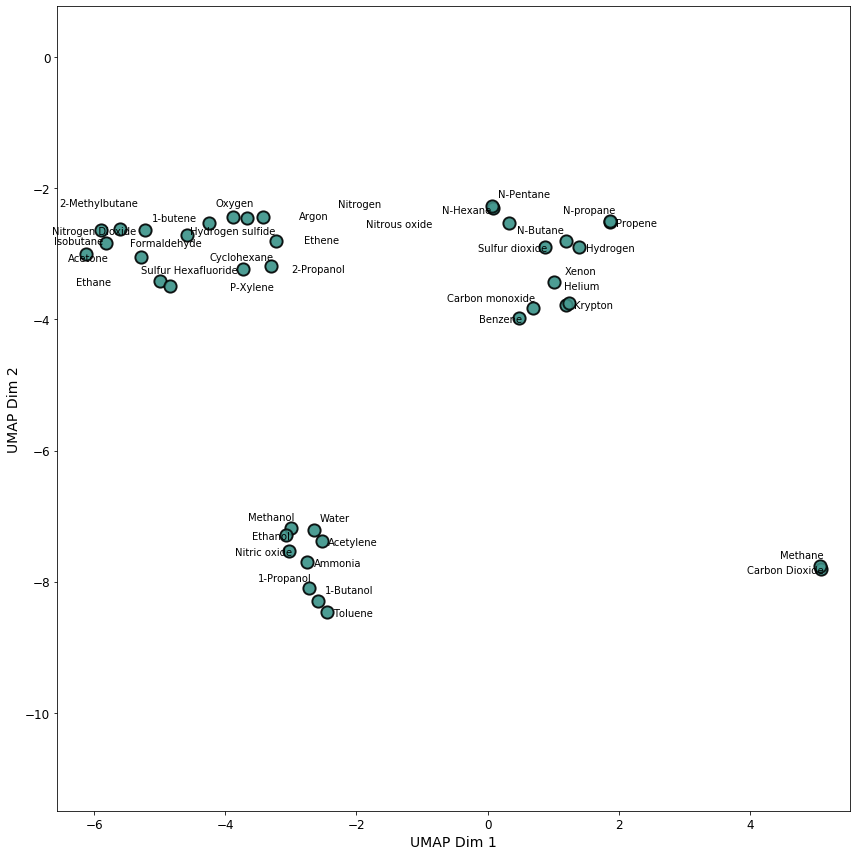

In [31]:
def plot_2d_gas_latent_space_w_labels(G, xlim, ylim, label_coords, circle_around, circle_radius, label_inside_circle=True):
    assert circle_around in gases
    circle_index = np.where(circle_around == gases)[0][0]
    fig, ax = plt.subplots(figsize=(12,12))
    ax.axis('equal')
    if G.shape[0] == 2:
        ax.scatter(G[0,:], G[1,:], s=150, c='#469990', alpha=0.8, edgecolor='k')
        circle = Circle((G[0, circle_index], G[1, circle_index]), circle_radius, facecolor='none',
                edgecolor='k', linewidth=3, alpha=0.75)
        #ax.add_patch(circle)
        ax.set_xlabel('Latent Dim 1', fontsize=14)
        ax.set_ylabel('Latent Dim 2', fontsize=14, rotation=0)
    elif M.shape[0] > 2:
        embedding = umap.UMAP(n_neighbors=3, min_dist=0.01, metric='euclidean').fit_transform(G.T)
        ax.scatter(embedding[:,0], embedding[:,1], s=150, c='#469990', alpha=0.8, edgecolor='k')
        
        circle = Circle((embedding[circle_index, 0], embedding[circle_index, 1]), circle_radius, facecolor='none',
                edgecolor='k', linewidth=3, alpha=0.75)
        #ax.add_patch(circle)
        label_indices = []
        #ax.set_xlim([embedding[circle_index, 0]-circle_radius, embedding[circle_index,0]+circle_radius])
        #ax.set_ylim([embedding[circle_index, 1]-circle_radius, embedding[circle_index,1]+circle_radius])
        
        for i in range(len(gases)):
            if np.linalg.norm(embedding[i, :] - embedding[circle_index, :]) <= circle_radius:
                ax.scatter(embedding[i, 0], embedding[i, 1], s=150, c='#469990', alpha=0.8, edgecolor='k', linewidth=2)
                label_indices.append(i)
        texts = [plt.text(embedding[i, 0]+0.075, embedding[i, 1]+0.075, gases[i], ha='center', va='center') for i in label_indices]
        adjust_text(texts)
        #for text in texts:
        #    x, y = text.get_unitless_position()
        #    material = text.get_text()
        #    material_index = np.where(materials == material)
        #    ax.plot([embedding[material_index, 0], x], [embedding[material_index, 1], y], c='k', lw=2)
        
        ax.set_xlabel('UMAP Dim 1', fontsize=14)
        ax.set_ylabel('UMAP Dim 2', fontsize=14)
    else:
        raise Exception()
    
    
    #ax.yaxis.tick_right()
    #ax.yaxis.set_ticks_position('right')
    #ax.yaxis.set_label_position('left')
    #ax.xaxis.tick_bottom()
    #ax.xaxis.set_ticks_position('top')
    #ax.xaxis.set_label_position('bottom')
    #ax.spines['right'].set_position('zero')
    #ax.spines['left'].set_color('none')
    #ax.spines['top'].set_position('zero')
    #ax.spines['bottom'].set_color('none')
    #ax.set_axisbelow(False)
    #ax.spines['right'].set_linewidth(2.5)
    #ax.spines['top'].set_linewidth(2.5)
    #ax.xaxis.set_label_coords(label_coords[0,0], label_coords[0,1])
    #ax.yaxis.set_label_coords(label_coords[1,0], label_coords[1,1])

    plt.tick_params(labelsize=12)

    #ax.text(ax.get_xlim()[0], ax.get_ylim()[1], 'Porous Material Latent Space', fontsize=14, weight='bold')
    #ax.set_title(title)
    #ax.set_xlim(xlim)
    #ax.set_ylim(ylim)
    
    plt.tight_layout()
    plt.savefig('pics/G_latent_space_w_labels.png', dpi=300, format='png')
    plt.show()
    return
parity_pred, train_Mbias, train_Gbias, r, lambda_l, lambda_b, train_err, train_hbar = extract_data_from_CV_dict(CV_dict, key=min_keys[-1])
M, G, Mbias, Gbias, train_error, loss, hbar = ALS(log_henry_df.values, r, [lambda_l, lambda_b], 1e-6, 1e-7, 50000, use_global_average=True, verbose=False)
plot_2d_gas_latent_space_w_labels(G, [-10, 10], [-10, 10], np.array([[1, 0.56], [0.55, 1]]), 'Helium', 0.5e3)

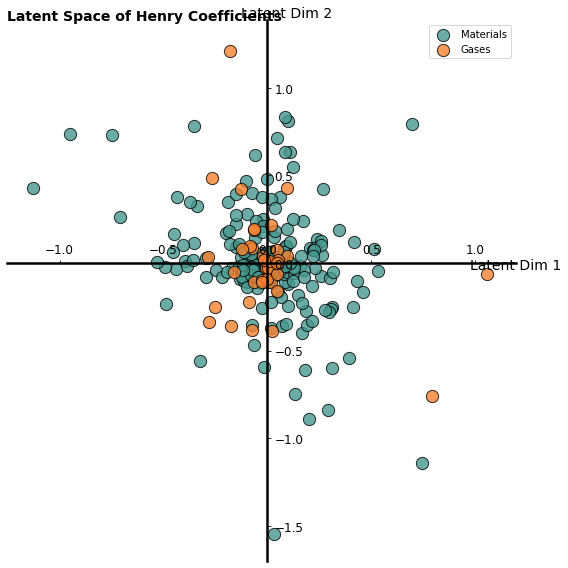

In [32]:
def plot_both_2d_latent_space(M, G, title, filename, label_coords):
    fig, ax = plt.subplots(figsize=(8,8))
    
    ax.scatter(M[0,:], M[1,:], s=150, c='#469990', alpha=0.8, edgecolor='k', label='Materials')
    ax.scatter(G[0,:], G[1,:], s=150, c='#f58231', alpha=0.8, edgecolor='k', label='Gases')
    ax.set_xlabel('Latent Dim 1', fontsize=14)
    ax.set_ylabel('Latent Dim 2', fontsize=14, rotation=0)
    ax.yaxis.tick_right()
    ax.yaxis.set_ticks_position('right')
    ax.yaxis.set_label_position('left')
    ax.xaxis.tick_bottom()
    ax.xaxis.set_ticks_position('top')
    ax.xaxis.set_label_position('bottom')
    ax.spines['right'].set_position('zero')
    ax.spines['left'].set_color('none')
    ax.spines['top'].set_position('zero')
    ax.spines['bottom'].set_color('none')
    ax.set_axisbelow(False)
    ax.spines['right'].set_linewidth(2.5)
    ax.spines['top'].set_linewidth(2.5)
    ax.xaxis.set_label_coords(label_coords[0,0], label_coords[0,1])
    ax.yaxis.set_label_coords(label_coords[1,0], label_coords[1,1])

    plt.tick_params(labelsize=12)
    
    ax.text(ax.get_xlim()[0], ax.get_ylim()[1], title, fontsize=14, weight='bold')
    #ax.set_title(title)
    plt.legend()
    plt.tight_layout()
    plt.savefig('pics/' + filename, dpi=300, format='pdf')
    plt.show()
    return
parity_pred, train_Mbias, train_Gbias, r, lambda_l, lambda_b, train_err, train_hbar = extract_data_from_CV_dict(CV_dict, key=min_keys[-1])
M, G, Mbias, Gbias, train_error, loss, hbar = ALS(log_henry_df.values, r, [lambda_l, lambda_b], 1e-6, 1e-7, 50000, use_global_average=True, verbose=False)
plot_both_2d_latent_space(M, G, 'Latent Space of Henry Coefficients', 'latent_space.pdf', np.array([[1, 0.56], [0.55, 1]]))

M shape: (6, 211)	G shape: (6, 40)
Train Loss on iteration 0: 1778.2797009997494
-------------
Training has converged after 769 iterations. See `convergence` parameter for convergence procedure.
Train loss: 696.9392608559676


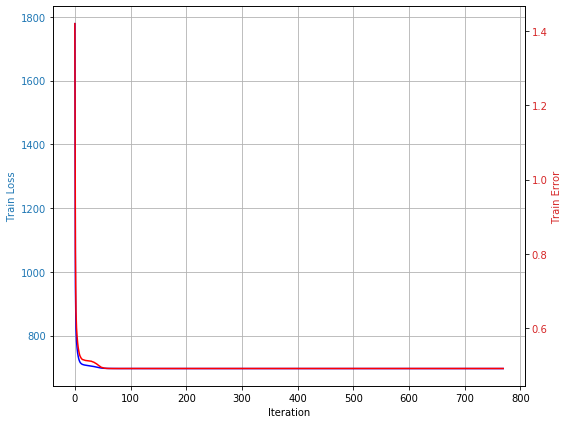

In [33]:
M, G, Mbias, Gbias, train_error, loss, hbar = ALS(log_henry_df.values, 6, [263.7, 29.76], 1e-6, 1e-7, 50000, use_global_average=True, verbose=True)

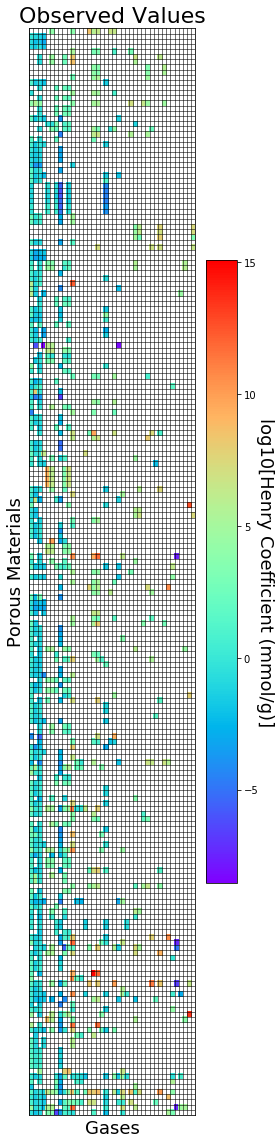

In [37]:
FLAG_SHOW_MATERIAL_AND_GAS_NAMES = False

matrix = log_henry_df.values
nm, ng = matrix.shape

fig, ax = plt.subplots(figsize=(4,16))

img = ax.pcolormesh(matrix, cmap='rainbow')

for y in range(nm):
    ax.plot([0, ng], [y, y], linewidth=0.55, color='k')
for x in range(ng):
    ax.plot([x, x], [0, nm], linewidth=0.55, color='k')

#cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.025,ax.get_position().height])
#extend_string = 'both' if colorbar_limits != None else 'neither'
cbar = plt.colorbar(img)
cbar.set_label('log10[Henry Coefficient (mmol/g)]', size=18, rotation=270)
cbar.ax.get_yaxis().labelpad = 15
ax.set_title('Observed Values', fontsize=22)
ax.set_xlabel('Gases', size=18)
ax.set_ylabel('Porous Materials', size=18)
if FLAG_SHOW_MATERIAL_AND_GAS_NAMES:
    ax.set_xticks(range(len(gases)))
    ax.set_xticklabels(gases, rotation=90)
    ax.set_yticks(range(len(materials)))
    ax.set_yticklabels(materials)
else:
    ax.set_xticks([])
    ax.set_yticks([])
plt.tight_layout()
plt.savefig('ActualValues.png', format='png', dpi=300)
plt.show()

In [ ]:
actual_cbar = [-6, 6]
new_row_order, new_col_order = sort_matrix_by_freq(log_henry_df.values)
actual_cbar = plot_matrix(log_henry_df.values[new_row_order, :][:, new_col_order], 'Actual Values', 'rainbow', 8, True, actual_cbar)
plot_matrix((M.T.dot(G) + Gbias + Mbias.T + hbar)[new_row_order, :][:, new_col_order], 'Predicted Values', 'rainbow', 8, False, [actual_cbar.vmin, actual_cbar.vmax])
plot_matrix((Gbias + Mbias.T + hbar)[new_row_order, :][:, new_col_order], '$g_b + m_b^T + \overline{h}$', 'rainbow', 8, False, [actual_cbar.vmin, actual_cbar.vmax])
plot_matrix(M.T.dot(G)[new_row_order, :][:, new_col_order], '$m^T_mg_g$', 'rainbow', 8, False, [actual_cbar.vmin, actual_cbar.vmax])

In [ ]:
def sort_df_by_freq(df):
    row_sum = np.sum(~np.isnan(df.values), axis=1)
    old_row_order = np.arange(len(row_sum))
    new_row_order = sorted(old_row_order, key=lambda x: row_sum[x], reverse=True)
    col_sum = np.sum(~np.isnan(df.values[new_row_order, :]), axis=0)
    old_col_order = np.arange(len(col_sum))
    new_col_order = sorted(old_col_order, key=lambda x: col_sum[x], reverse=True)
    return new_row_order, new_col_order
new_row_order, new_col_order = sort_df_by_freq(log_henry_df)

In [ ]:
parity_pred, train_Mbias, train_Gbias, r, lambda_l, lambda_b, train_err, train_hbar = extract_data_from_CV_dict(CV_dict, key=min_keys[-1], ignore_all_but_heatmap_stuff=False)

fig = plt.figure(figsize=(25,30))
ax = plt.gca()
h_diff = np.clip(parity_pred - log_henry_df.values, -1e4, 1e6)

for y in range(log_henry_df.shape[0]):
    plt.plot([0-0.5, log_henry_df.shape[1]-0.5], [y-0.5, y-0.5], linewidth=1.25, color='k')
for x in range(log_henry_df.shape[1]):
    plt.plot([x-0.5, x-0.5], [0-0.5, log_henry_df.shape[0]-0.5], linewidth=1.25, color='k')

plt.imshow(h_diff[new_row_order, :][:, new_col_order], interpolation='none', cmap='rainbow')
cbar = plt.colorbar(extend='both')
cbar.set_label('Henry Coefficient [mmol/g-bar]', fontsize=14, rotation=270, labelpad=25)

ax.set_xticks(np.arange(parity_pred.shape[1]))
ax.set_xticklabels([key_to_gas[log_henry_df.columns[i].split('_')[0]] for i in new_col_order], rotation=90, fontsize=12, ha='right')

ax.set_yticks(np.arange(parity_pred.shape[0]))
ax.set_yticklabels([key_to_material[log_henry_df.index[i]] for i in new_row_order], fontsize=12)
plt.title('Difference between Predicted and Actual values', fontsize=20)
plt.tight_layout()
plt.savefig('pics/another_coolpic.pdf', format='pdf', dpi=300)

plt.show()

In [ ]:
def parity_plot_real(actual, prediction, title):
    fig, ax = plt.subplots(figsize=(10,8))
    
    prediction = prediction.flatten()
    actual = actual.values.flatten()
    mask = ~np.isnan(actual)
    
    ax.scatter(10**(prediction[mask]), 10**(actual[mask]))
    #ax.hexbin(np.exp(prediction[mask]), np.exp(actual[mask]))
    lim = [np.min([np.min(actual[mask]), np.min(np.exp(prediction[mask]))]), np.max([np.max(actual[mask]), np.max(np.exp(prediction[mask]))])]

    ax.plot(lim, lim, c='r')
    ax.set_xlabel('Predicted Henry constant', fontsize=14)
    ax.set_ylabel('True Henry constant', fontsize=14)
    ax.set_xlim(lim)
    ax.set_ylim(lim)
    
    ax2 = fig.add_axes([0.625, 0.175, 0.25, 0.25])
    ax2.scatter(np.exp(prediction[mask]), np.exp(actual[mask]))
    ax2.set_xlim([lim[0], lim[1]/1000])
    ax2.set_ylim([lim[0], lim[1]/1000])
    ax2.plot(lim, lim, c='r')
    ax.set_title(title, fontsize=16)
    plt.show()

parity_pred, train_Mbias, train_Gbias, r, lambda_l, lambda_b, train_err, train_hbar = extract_data_from_CV_dict(CV_dict, key=min_keys[0], ignore_all_but_heatmap_stuff=False)
parity_plot_real(log_henry_df, parity_pred, 'RecSys')

In [ ]:
def bootstrap_matrix(henry_matrix, rows):
    #assert len(cols) == henry_matrix.shape[1]
    return henry_matrix[rows, :]
cols = np.arange(log_henry_df.values.shape[1])
random_cols = np.sort(np.random.choice(cols, log_henry_df.values.shape[1], replace=True))
bootstrapped_H = bootstrap_matrix(log_henry_df.values, random_cols)
bootstrapped_H

In [ ]:
def bagging_estimation(henry_matrix, r, lambda_l, lambda_b, q):
    assert q > 0, '`q` is the number of different matrices we will create for the bagging'
    print('Starting Row-Based bagging:')
    # Create an array of row indices that will be rearranged for every bagging iteration
    rows = np.arange(henry_matrix.values.shape[0])
    henry_shape = henry_matrix.values.shape
    bagging_henry_coeffs = [[[] for _ in range(henry_shape[1])] for _ in range(henry_shape[0])]
    
    for _q in range(q):
        randomized_rows = np.sort(np.random.choice(rows, henry_shape[0], replace=True))
        # We look at the unique rows that pop up in the bootstrapped H, and count their frequency
        _, row_frequency_idx, row_frequency = np.unique(randomized_rows, 
                                                                    return_inverse=True, return_counts=True)
        # We construct the new bootstrapped H with the randomized columns from the original H and train on the data
        bootstrapped_H = bootstrap_matrix(henry_matrix.values, randomized_rows)
        bagged_M, bagged_G, bagged_Mbias, bagged_Gbias, train_error, loss, hbar = ALS(bootstrapped_H, 
                                            r, [lambda_l, lambda_b], 1e-6, 1e-7, 100, use_global_average=True, verbose=False)
        bagged_H = bagged_M.T.dot(bagged_G) + bagged_Mbias.T + hbar + bagged_Gbias
        # The rows in bagged_H don't correspond to the rows in the henry matrix, so we create another matrix
        #     where we transfer the randomized rows in bagged_H into the 'correct' rows that correspond to the original H
        H_with_correct_gases_and_materials = np.zeros(bagged_H.shape)
        for i in range(bagged_H.shape[0]):
            for j in range(bagged_H.shape[1]):
                # We utilize the frequency of each row in randomized_rows 
                #     so we can take the average of the predicted Henry coefficients
                H_with_correct_gases_and_materials[randomized_rows[i], j] += (bagged_H[i, j] \
                                                            / row_frequency[row_frequency_idx[i]])
        # We use np.where to find the Henry coefficients that we predicted in the bagging process
        # Due to the random nature of the bootstrap method not every row might be expressed in bootstrapped_H
        #     so we have to start by finding the ones that were expressed
        observed_indices = np.where(H_with_correct_gases_and_materials != 0)
        for i in range(len(observed_indices[0])):
            observed_material = observed_indices[0][i]
            observed_gas = observed_indices[1][i]
            bagging_henry_coeffs[observed_material][observed_gas].append(
                        H_with_correct_gases_and_materials[observed_material, observed_gas])
        if _q % 100 == 0:
            print('Bagging iteration {} completed'.format(_q))
    print('{} iterations finished!'.format(q))
    return bagging_henry_coeffs

bags = bagging_estimation(log_henry_df, r, lambda_l, lambda_b, 500)


In [ ]:
def analyze_bags(bags, gas, mof, plot=True):
    gas_index = np.where(log_henry_df.columns == gas + '_298K')[0][0]
    mof_index = np.where(log_henry_df.index == mof)[0][0]

    bag = bags[mof_index][gas_index]
    avg_henry = np.mean(bag)
    stdev = np.std(bag)
    q25 = np.quantile(bag, 0.25)
    q75 = np.quantile(bag, 0.75)
    
    if plot:
        fig, ax = plt.subplots(figsize=(8,6))
        h = ax.hist(bag, bins=20)
        ylim = ax.get_ylim()
        ax.plot([q25, q25], [0, ylim[1]], color='red')
        ax.text(q25, ylim[1]*0.9, 'First quartile ', ha='right', color='red')
        ax.plot([q75, q75], [0, ylim[1]], color='red')
        ax.text(q75, ylim[1]*0.9, ' Third quartile', ha='left', color='red')
        ax.set_ylim(ylim)
        ax.set_xlabel('Henry coefficient [mmol/g-bar]')
        ax.set_ylabel('# Henry Coefficients')
        ax.set_title('Confidence of {:s} adsorption in {:s}'.format(key_to_gas[gas], key_to_material[mof]))
        plt.show()
    return avg_henry, stdev, q25, q75

#avg_henry, stdev = analyze_bags(bags, gas_to_key['Krypton'], log_henry_df.index[2])
avg_henry, stdev, q25, q75 = analyze_bags(bags, gas_to_key['Krypton'], log_henry_df.index[2])

In [ ]:
gas_key = gas_to_key['Krypton']
for mof_key in log_henry_df.index[:5]:
    avg_henry, stdev, q25, q75 = analyze_bags(bags, gas_key, mof_key)
    print('First quartile: {:.3f}\nThird quartlie: {:.3f}'.format(q25, q75))
    print('-------------------------------------------------')

In [ ]:
quartile_gap = np.zeros(log_henry_df.values.shape)

for (i, mof_key) in enumerate(log_henry_df.index):
    for (j, gas_key) in enumerate(log_henry_df.columns):
        avg_henry, stdev, q25, q75 = analyze_bags(bags, gas_key.split('_')[0], mof_key, plot=False)
        quartile_gap[i,j] = np.abs(q75-q25)
plot_matrix(quartile_gap, 'Uncertainty', 8)

In [ ]:
parity_pred, train_Mbias, train_Gbias, r, lambda_l, lambda_b, train_err, train_hbar = extract_data_from_CV_dict(CV_dict, key=min_keys[-1], ignore_all_but_heatmap_stuff=False)

M, G, Mbias, Gbias, train_error, loss, hbar = ALS(log_henry_df.values, r, [lambda_l, lambda_b], 1e-6, 1e-7, 50000, use_global_average=True, verbose=True)
H = M.T.dot(G) + Mbias.T + hbar + Gbias

non_missing_values = ~np.isnan(log_henry_df.values)
H[non_missing_values] = log_henry_df.values[non_missing_values]

In [ ]:
def find_best_gas_separator(H, is_nan, gas1, gas2, maxnumber=15):
    assert gas1 + '_298K' in log_henry_df.columns and gas2 + '_298K' in log_henry_df.columns
    
    gas_index1 = np.where(log_henry_df.columns == gas1 + '_298K')[0][0]
    gas_index2 = np.where(log_henry_df.columns == gas2 + '_298K')[0][0]
    
    Nm = len(log_henry_df.index)
    selectivities = np.zeros(Nm)
    
    for i in range(Nm):
        selectivities[i] = np.exp(H[i, gas_index1]) / np.exp(H[i, gas_index2])
    sorted_indices = np.argsort(selectivities)
    
    print('Best Materials to separate {:s} and {:s}\n'.format(key_to_gas[gas1], key_to_gas[gas2]))
    for (i, index) in enumerate(sorted_indices[::-1]):
        if i > maxnumber:
            break
        bold_string1 = ''
        bold_string2 = ''
        end_string1 = ''
        end_string2 = ''
        if ~is_nan[index, gas_index1]:
            bold_string1 = '\033[1m'
            end_string1 = '\033[0m'
        if ~is_nan[index, gas_index2]:
            bold_string2 = '\033[1m'
            end_string2 = '\033[0m'
        print('#{:d}: {:40s}\t {:s}{:s}{:s}/{:s}{:s}{:s} = {:.3f}\n'.format(i+1, key_to_material[log_henry_df.index[index]], 
                                                          bold_string1, key_to_gas[gas1], end_string1,
                                                          bold_string2, key_to_gas[gas2], end_string2, selectivities[index]))
    return

find_best_gas_separator(H, np.isnan(log_henry_df.values), gas_to_key['Xenon'], gas_to_key['Krypton'])

In [ ]:
fig = plt.figure(figsize=(12,24))
ax = plt.gca()
temp_h = np.copy(H)

new_row_order, new_col_order = sort_df_by_freq(pd.DataFrame(temp_h))

for y in range(log_henry_df.shape[0]):
    plt.plot([0-0.5, log_henry_df.shape[1]-0.5], [y-0.5, y-0.5], linewidth=1.25, color='k')
for x in range(log_henry_df.shape[1]):
    plt.plot([x-0.5, x-0.5], [0-0.5, log_henry_df.shape[0]-0.5], linewidth=1.25, color='k')

plt.imshow(temp_h[new_row_order, :][:, new_col_order], interpolation='none', cmap='rainbow', norm=matplotlib.colors.Normalize())
cbar = plt.colorbar(extend='both')
cbar.set_label('log[Henry Coefficient [mmol/g-bar]]', fontsize=14, rotation=270, labelpad=25)

ax.set_xticks(np.arange(parity_pred.shape[1]))
ax.set_xticklabels([key_to_gas[log_henry_df.columns[i].split('_')[0]] for i in new_col_order], rotation=90, fontsize=12, ha='center')

ax.set_yticks(np.arange(parity_pred.shape[0]))
ax.set_yticklabels(['{:.10s}'.format(key_to_material[log_henry_df.index[i]]) for i in new_row_order], fontsize=12)
plt.title('Predicted values', fontsize=20)
plt.tight_layout()
plt.savefig('pics/CoolPic.pdf', dpi=300, format='pdf')

plt.show()

## Lets try a permutation test!

In [ ]:
def create_perturbed_H(henry_matrix):
    H_permuted = np.copy(henry_matrix)
    # Look up all the indices that correspond to an observed Henry coefficient in H
    material_index, gas_index = np.where(~np.isnan(henry_matrix))
    nb_known_henrys = len(gas_index)
    random_perturbation_index = np.arange(nb_known_henrys)
    np.random.shuffle(random_perturbation_index)
    for d in range(nb_known_henrys):
        # Choose two random indeces for `gas_index` and `material_index` in order to find 
        #  two observed Henry coefficients to swap
        i = material_index[random_perturbation_index[d]]
        j = gas_index[random_perturbation_index[d]]
        H_permuted[i, j] = henry_matrix[material_index[d], gas_index[d]]
    assert np.array_equal(np.isnan(henry_matrix), np.isnan(H_permuted))
    return H_permuted
perturbed_H = create_perturbed_H(log_henry_df.values)

In [ ]:
perturbed_H_df = pd.DataFrame(perturbed_H)
_r = [2]
_lambd_l = np.logspace(-2, 6, num=10)
_lambd_b = np.logspace(-6, 1, num=10)
fold_matrix = k_fold_split(perturbed_H_df, 3, max_iter=10000)
perturbed_CV_dict = {}
gas_mean_parity_pred = np.zeros(perturbed_H.shape)
mof_mean_parity_pred = np.zeros(perturbed_H.shape)


for r in _r:
    for lambd_l in _lambd_l:
        for lambd_b in _lambd_b:
            for test_fold in range(3):
                train_mean_gas = np.mean(perturbed_H_df.mask(fold_matrix == test_fold), axis=0)
                train_mean_material = np.mean(perturbed_H_df.mask(fold_matrix == test_fold), axis=1)
                for row in range(perturbed_H.shape[0]):
                    for col in range(perturbed_H.shape[1]):
                        if fold_matrix[row,col] == test_fold:
                            gas_mean_parity_pred[row,col] = train_mean_gas[col]
                            mof_mean_parity_pred[row,col] = train_mean_material[row]
            test_error, Mbias, Gbias, parity_pred, loss, hbar = cross_validation(perturbed_H_df, fold_matrix, r, [lambd_l, lambd_b])
            cv_key = '{}_{}_{}'.format(r, lambd_l, lambd_b)
            perturbed_CV_dict['{}_err'.format(cv_key)] = test_error
            perturbed_CV_dict['{}_pred'.format(cv_key)] = parity_pred
            perturbed_CV_dict['{}_mbias'.format(cv_key)] = Mbias
            perturbed_CV_dict['{}_gbias'.format(cv_key)] = Gbias
            perturbed_CV_dict['{}_r'.format(cv_key)] = r
            perturbed_CV_dict['{}_lambdal'.format(cv_key)] = lambd_l
            perturbed_CV_dict['{}_lambdab'.format(cv_key)] = lambd_b
            perturbed_CV_dict['{}_loss'.format(cv_key)] = loss
            perturbed_CV_dict['{}_hbar'.format(cv_key)] = hbar
      

In [ ]:
perturbed_min_keys = []
for r in _r:
    min_key = "asdf"
    min_err = np.inf
    for key in perturbed_CV_dict:
        if key.split('_')[-1] != 'err' or key.split('_')[0] != str(r):
            continue
        if type(perturbed_CV_dict[key]) != np.float64:
            continue
        if perturbed_CV_dict[key] < min_err:
            min_err = perturbed_CV_dict[key]
            min_key = key
    perturbed_min_keys.append(min_key)

perturbed_min_keys

In [ ]:
# If key is not none, will return floats as results, otherwise, an array of values from CV run
def extract_data_from_CV_dict(CV_dict, key=None):
    if key:
        parity_pred = CV_dict['_'.join(key.split('_')[:-1]) + '_pred']
        Mbias = CV_dict['_'.join(key.split('_')[:-1]) + '_mbias']
        Gbias = CV_dict['_'.join(key.split('_')[:-1]) + '_gbias']
        r = CV_dict['_'.join(key.split('_')[:-1]) + '_r']
        lambda_l = CV_dict['_'.join(key.split('_')[:-1]) + '_lambdal']
        lambda_b = CV_dict['_'.join(key.split('_')[:-1]) + '_lambdab']
        err = CV_dict['_'.join(key.split('_')[:-1]) + '_err']
        hbar = CV_dict['_'.join(key.split('_')[:-1]) + '_hbar']
    else:
        parity_pred = np.array([])
        Mbias = np.array([])
        Gbias = np.array([])
        r = np.array([], dtype=np.int)
        lambda_l = np.array([])
        lambda_b = np.array([])
        err = np.array([])
        hbar = np.array([])
        for _key in CV_dict.keys():
            parity_pred = np.append(parity_pred, CV_dict['_'.join(_key.split('_')[:-1]) + '_pred'])
            Mbias = np.append(Mbias, CV_dict['_'.join(_key.split('_')[:-1]) + '_mbias'])
            Gbias = np.append(Gbias, CV_dict['_'.join(_key.split('_')[:-1]) + '_gbias'])
            r = np.append(r, CV_dict['_'.join(_key.split('_')[:-1]) + '_r'])
            lambda_l = np.append(lambda_l, CV_dict['_'.join(_key.split('_')[:-1]) + '_lambdal'])
            lambda_b = np.append(lambda_b, CV_dict['_'.join(_key.split('_')[:-1]) + '_lambdab'])
            err = np.append(err, CV_dict['_'.join(_key.split('_')[:-1]) + '_err'])
            hbar = np.append(hbar, CV_dict['_'.join(_key.split('_')[:-1]) + '_hbar'])
    return parity_pred, Mbias, Gbias, r, lambda_l, lambda_b, err, hbar
parity_pred, Mbias, Gbias, r, lambda_l, lambda_b, err, hbar = extract_data_from_CV_dict(perturbed_CV_dict, key=perturbed_min_keys[0])

In [ ]:
def parity_plot(actual, parity_pred, title):
    fig, ax = plt.subplots(figsize=(10,10))
    
    prediction = parity_pred.flatten()
    actual = actual.values.flatten()
    mask = ~np.isnan(actual)
    
    # Here a colormap was rigged so the background of the parity plots would be transparent
    my_cmap = plt.cm.get_cmap('Reds')
    colors = my_cmap(np.arange(my_cmap.N))
    colors[0,3] = 0.0
    my_cmap = matplotlib.colors.ListedColormap(colors)

    test_mean = np.nanmean(actual)
    R_squared = 1 - (np.sum([(actual[i] - prediction[i])**2 for i in np.arange(len(actual))[mask]]) / np.sum([(actual[i] - test_mean)**2 for i in np.arange(len(actual))[mask]]))
    ax.hexbin(prediction[mask], actual[mask], gridsize=(100,100), cmap=my_cmap, linewidth=0.25)
    #ax.scatter(prediction[mask], actual[mask])
    #lim = [-10, 10]
    
    lim = [np.max([np.min(actual[mask]), np.min(prediction[mask])]), np.min([np.max(actual[mask]), np.max(prediction[mask])])]
    
    ax.plot(lim, lim, c='r')
    ax.set_xlabel('log [Predicted Henry Constant]', fontsize=14)
    ax.set_ylabel('log [True Henry Constant]', fontsize=14)
    ax.set_xlim(lim)
    ax.set_ylim(lim)
    ax.text(lim[0]*0.95, lim[1]*0.7, '$R^2$ = {:.4f}'.format(R_squared), fontsize=16)
    ax.set_title(title, fontsize=16)
    plt.tight_layout()
    plt.savefig('pics/' + title + '.pdf', format='pdf', dpi=300)
    
    plt.show()
for min_key in perturbed_min_keys:
    parity_pred, Mbias, Gbias, r, lambda_l, lambda_b, err, hbar = extract_data_from_CV_dict(perturbed_CV_dict, key=min_key)
    parity_plot(log_henry_df, parity_pred, 'Perturbed Log[RecSys], r={}'.format(r))
parity_pred, Mbias, Gbias, r, lambda_l, lambda_b, err, hbar = extract_data_from_CV_dict(CV_dict, key=min_keys[0])
parity_plot(log_henry_df, parity_pred, 'Log[RecSys], r=0')
parity_plot(log_henry_df, gas_mean_parity_pred, 'Perturbed Gas-Centric Model')
parity_plot(log_henry_df, mof_mean_parity_pred, 'Perturbed MOF-Centric Model')